# Deep Learning

IMPORTANTE: TODO EL CÓDIGO ESTÁ ESTRUCTURADO PARA PODER CORRER CADA CELDA INDIVIDUALMENTE (EXCEPTO LAS DE COLAB)

## Analisis del dataset y sus características

Vamos a analizar el dataset de imagenes para la entender la distribucion de las mismas y contemplar una posible reestructuración, ya sea de dimensiones, calidad o de número de imágenes, para que puedan ser procesadas correctamente.

🔍 Buscando datos desde: c:\Users\Equipo\Desktop\Machine_DL...
✅ ¡ENCONTRADO!

MASCOTA: Miki & Molly (ID: 94aec9453)
Raza:    Mixed Breed
Target:  2
--- Análisis de Sentimiento (JSON) ---
Score:     0.9 (Polaridad -1 a 1)
Magnitude: 0.9 (Intensidad)


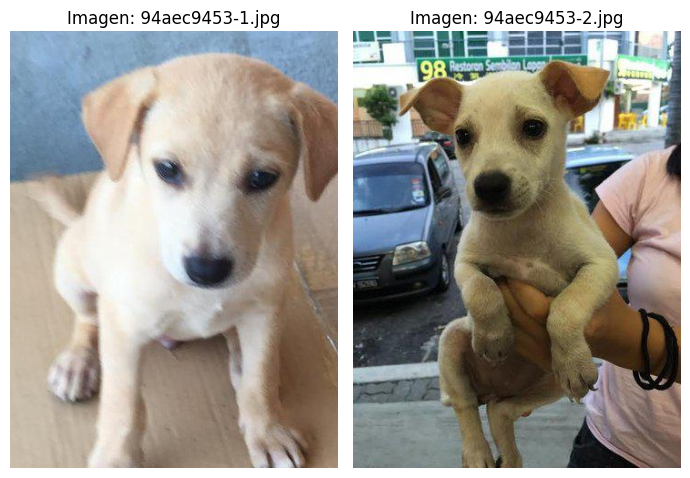

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import json 

current_dir = os.getcwd()
search_start = ".." 

print(f"🔍 Buscando datos desde: {os.path.abspath(search_start)}...")

train_path = None
root_data_folder = None

for root, dirs, files in os.walk(search_start):
    if "train.csv" in files:
        train_path = os.path.join(root, "train.csv")
        if os.path.basename(root) == 'train':
            root_data_folder = os.path.dirname(root)
        else:
            root_data_folder = root
        
        print(f"✅ ¡ENCONTRADO!")
        break

if not train_path:
    raise FileNotFoundError("❌ No se pudo localizar 'train.csv'.")

# Rutas de carpetas
TRAIN_IMG_DIR = os.path.join(root_data_folder, 'train_images')
TRAIN_JSON_DIR = os.path.join(root_data_folder, 'train_sentiment') 

train = pd.read_csv(train_path)
breeds = pd.read_csv(os.path.join(root_data_folder, 'breed_labels.csv'))
breed_dict = dict(zip(breeds['BreedID'], breeds['BreedName']))

def get_breed_name(breed_id):
    return breed_dict.get(breed_id, "Desconocido")

def visualizar_mascota(pet_id=None):
    if pet_id is None:
        pet_id = train.sample(1)['PetID'].values[0]
    
    pet_data = train[train['PetID'] == pet_id].iloc[0]
    
    print(f"\n{'='*40}")
    print(f"MASCOTA: {pet_data['Name']} (ID: {pet_id})")
    print(f"Raza:    {get_breed_name(pet_data['Breed1'])}")
    print(f"Target:  {pet_data['AdoptionSpeed']}") 

    # CARGAR DATOS DEL JSON (SENTIMIENTO) 
    json_path = os.path.join(TRAIN_JSON_DIR, f"{pet_id}.json")
    if os.path.exists(json_path):
        with open(json_path, 'r') as f:
            data = json.load(f)
            sentiment = data['documentSentiment']
            print(f"--- Análisis de Sentimiento (JSON) ---")
            print(f"Score:     {sentiment['score']} (Polaridad -1 a 1)") 
            print(f"Magnitude: {sentiment['magnitude']} (Intensidad)") 
    else:
        print(">> No se encontró archivo JSON de sentimiento.")

    # VISUALIZAR IMÁGENES
    if os.path.exists(TRAIN_IMG_DIR):
        images = [f for f in os.listdir(TRAIN_IMG_DIR) if str(pet_id) in f and f.endswith('.jpg')]
        images.sort()
        
        if images:
            n_img = len(images)
            n_cols = 2
            n_rows = (n_img + 1) // 2  # Calcula filas necesarias
            
            fig, axes = plt.subplots(n_rows, n_cols, figsize=(7, 5 * n_rows))
            axes = axes.flatten() # Aplanar para iterar 
            
            for i, img_file in enumerate(images):
                img_path = os.path.join(TRAIN_IMG_DIR, img_file)
                img = mpimg.imread(img_path)
                axes[i].imshow(img)
                axes[i].set_title(f"Imagen: {img_file}")
                axes[i].axis('off')
            
            # Ocultar ejes vacíos si el número de imágenes es impar
            for j in range(i + 1, len(axes)):
                axes[j].axis('off')
                
            plt.tight_layout()
            plt.show()
        else:
            print(">> No hay fotos para esta mascota.")
    else:
        print(f">> Carpeta de imágenes no encontrada.")

# Ejecutar
visualizar_mascota()


🐾 MASCOTA: Miki & Molly (ID: 94aec9453)
🧬 Raza:    Mixed Breed
⏱️ Target:  2 (Clase ordinal)

--- 📝 ANÁLISIS DE TEXTO (JSON) ---
Score Global:     0.9 (-1 a 1)
Magnitud Global:  0.9
Frase de ejemplo: "Cute Puppies - Miki &amp; Molly Lab Mixed Age : 2 months Dewormed Healthy &amp; Friendly Adoption Fee : RM for vaccination &amp; others"


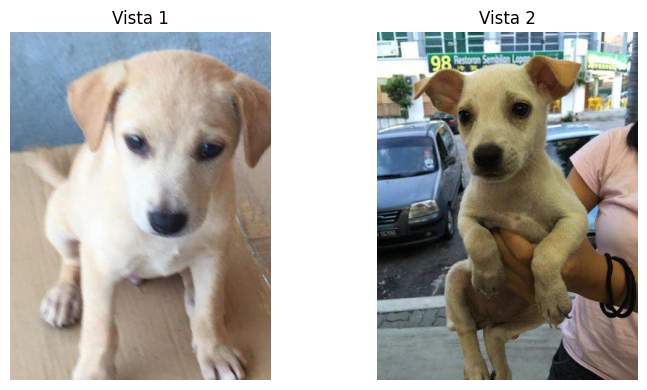

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import json 

current_dir = os.getcwd()
search_start = ".." 

train_path = None
root_data_folder = None

for root, dirs, files in os.walk(search_start):
    if "train.csv" in files:
        train_path = os.path.join(root, "train.csv")
        root_data_folder = os.path.dirname(root) if os.path.basename(root) == 'train' else root
        break

if not train_path:
    raise FileNotFoundError("❌ No se pudo localizar 'train.csv'.")

TRAIN_IMG_DIR = os.path.join(root_data_folder, 'train_images')
TRAIN_JSON_DIR = os.path.join(root_data_folder, 'train_sentiment')

# CARGA DE DATOS 
train = pd.read_csv(train_path)
breeds = pd.read_csv(os.path.join(root_data_folder, 'breed_labels.csv'))
breed_dict = dict(zip(breeds['BreedID'], breeds['BreedName']))

def get_breed_name(breed_id):
    return breed_dict.get(breed_id, "Desconocido")

# FUNCIÓN PRINCIPAL 
def visualizar_mascota(buscar_id=None):
    if buscar_id:
        if buscar_id in train['PetID'].values:
            pet_id = buscar_id
        else:
            print(f"⚠️ ID {buscar_id} no encontrado. Mostrando una aleatoria...")
            pet_id = train.sample(1)['PetID'].values[0]
    else:
        pet_id = train.sample(1)['PetID'].values[0]
    
    pet_data = train[train['PetID'] == pet_id].iloc[0]
    
    print(f"\n{'='*50}")
    print(f"🐾 MASCOTA: {pet_data['Name']} (ID: {pet_id})")
    print(f"🧬 Raza:    {get_breed_name(pet_data['Breed1'])}")
    print(f"⏱️ Target:  {pet_data['AdoptionSpeed']} (Clase ordinal)")
    
    #  CARGAR JSON 
    json_path = os.path.join(TRAIN_JSON_DIR, f"{pet_id}.json")
    if os.path.exists(json_path):
        with open(json_path, 'r') as f:
            data = json.load(f)
            sentiment = data['documentSentiment']
            print(f"\n--- 📝 ANÁLISIS DE TEXTO (JSON) ---")
            print(f"Score Global:     {sentiment['score']} (-1 a 1)")
            print(f"Magnitud Global:  {sentiment['magnitude']}")
            
            if 'sentences' in data and len(data['sentences']) > 0:
                ejemplo_frase = data['sentences'][0]['text']['content']
                print(f"Frase de ejemplo: \"{ejemplo_frase}\"")
    else:
        print("\n>> No se encontró archivo JSON de sentimiento.")

    #  VISUALIZAR
    if os.path.exists(TRAIN_IMG_DIR):
        images = [f for f in os.listdir(TRAIN_IMG_DIR) if str(pet_id) in f and f.endswith('.jpg')]
        images.sort()
        
        if images:
            n_img = len(images)
            n_cols = 2
            n_rows = (n_img + 1) // 2
            
            # Crear la figura
            fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 4 * n_rows))
            
            # Convertir axes a una lista plana sin importar la forma
            if n_img == 1:
                axes_flat = [axes]
            else:
                axes_flat = axes.flatten()
            
            for i, img_file in enumerate(images):
                img_path = os.path.join(TRAIN_IMG_DIR, img_file)
                img = mpimg.imread(img_path)
                axes_flat[i].imshow(img)
                axes_flat[i].set_title(f"Vista {i+1}")
                axes_flat[i].axis('off')
            
            # Ocultar los huecos vacíos de la cuadrícula
            for j in range(i + 1, len(axes_flat)):
                axes_flat[j].axis('off')
                
            plt.tight_layout()
            plt.show()
        else:
            print(">> No hay fotos disponibles.")
    print(f"{'='*50}\n")

# Ejecutar
visualizar_mascota(buscar_id='94aec9453')

✅ Analizando datos en: c:\Users\Equipo\Desktop\Machine_DL\datos tratados


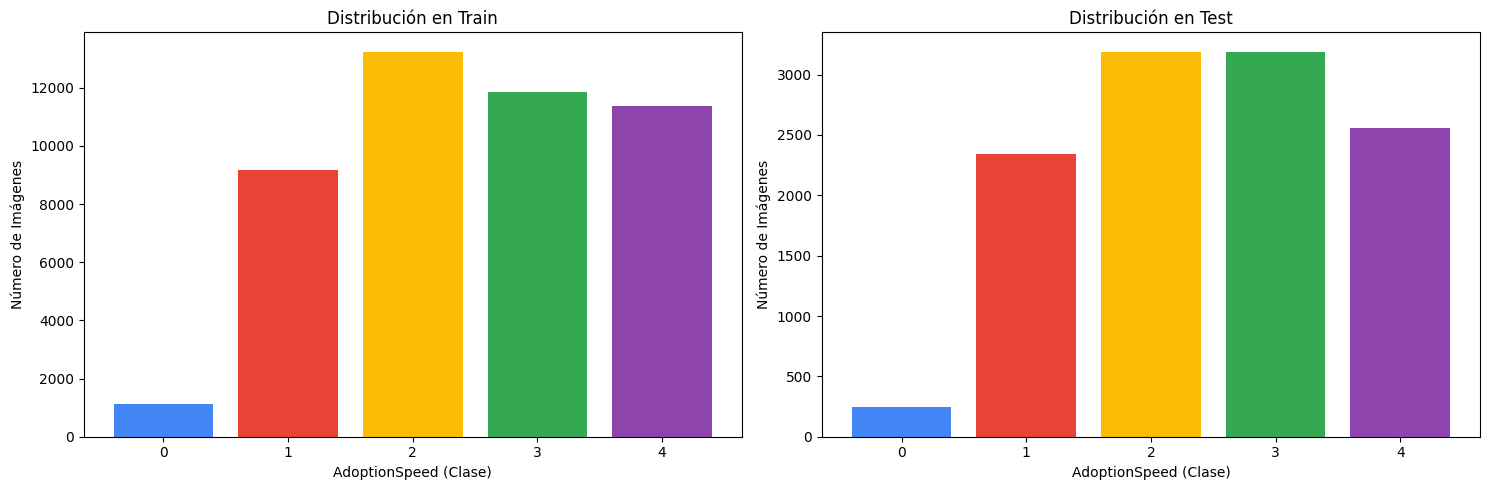

In [ ]:
import matplotlib.pyplot as plt
import os
import seaborn as sns 
def graficar_distribucion(nombre_carpeta='datos tratados'):
    #  Detección de ruta
    if os.path.exists(nombre_carpeta):
        base_path = nombre_carpeta
    elif os.path.exists(os.path.join(r'G:\Mi unidad\Mascotas', nombre_carpeta)):
        base_path = os.path.join(r'G:\Mi unidad\Mascotas', nombre_carpeta) 
    else:
        print(f"❌ No se encuentra la carpeta '{nombre_carpeta}'")
        return

    print(f"✅ Analizando datos en: {os.path.abspath(base_path)}")

    sets = ['Train', 'Test']
    clases = ['0', '1', '2', '3', '4']
    colores = ['#4285F4', '#EA4335', '#FBBC05', '#34A853', '#8E44AD']
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 6)) 
    
    for i, s in enumerate(sets):
        counts = []
        for c in clases:
            path = os.path.join(base_path, s, c)
            if os.path.exists(path):
                # Solo contamos archivos, no carpetas
                counts.append(len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]))
            else:
                counts.append(0)
        
        bars = ax[i].bar(clases, counts, color=colores, edgecolor='black', alpha=0.8)
        ax[i].set_title(f'Distribución en {s}', fontsize=14, fontweight='bold')
        ax[i].set_xlabel('AdoptionSpeed (Clase)', fontsize=12)
        ax[i].set_ylabel('Número de Imágenes', fontsize=12)
        ax[i].grid(axis='y', linestyle='--', alpha=0.6)
        
        # Añadir el número total encima de cada barra
        for bar in bars:
            height = bar.get_height()
            ax[i].annotate(f'{height}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 puntos de offset vertical
                        textcoords="offset points",
                        ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

graficar_distribucion()

🔍 Analizando subcarpetas en: G:\Mi unidad\Mascotas\datos tratados\Train
📁 Procesando clase 0 (1045 imágenes)...


100%|██████████| 1045/1045 [00:09<00:00, 107.57it/s]


📁 Procesando clase 1 (8672 imágenes)...


100%|██████████| 8672/8672 [01:26<00:00, 100.63it/s]


📁 Procesando clase 2 (12145 imágenes)...


100%|██████████| 12145/12145 [02:09<00:00, 93.83it/s] 


📁 Procesando clase 3 (10614 imágenes)...


100%|██████████| 10614/10614 [01:27<00:00, 121.66it/s]


📁 Procesando clase 4 (10364 imágenes)...


100%|██████████| 10364/10364 [01:40<00:00, 103.42it/s]


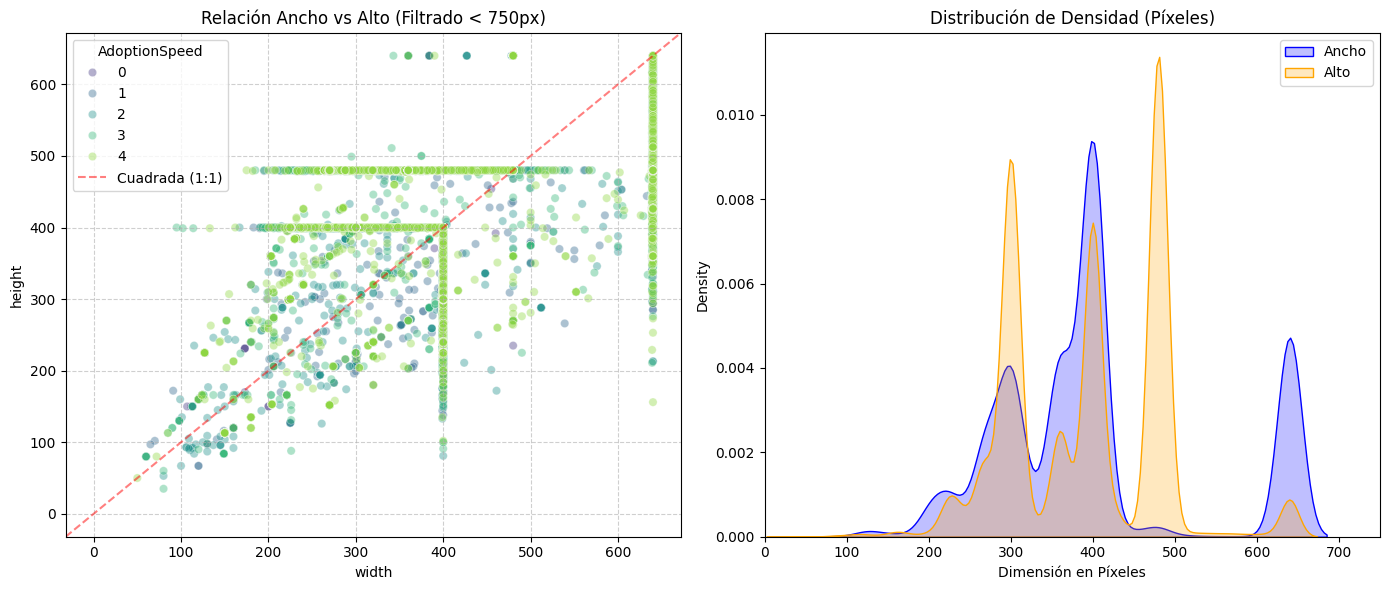


📊 Resumen de Resoluciones (Sin Outliers):
              width        height
count  42839.000000  42839.000000
mean     399.001704    390.319172
std      126.332044     93.350147
min       50.000000     35.000000
25%      300.000000    300.000000
50%      400.000000    400.000000
75%      400.000000    480.000000
max      640.000000    640.000000

📏 Relación de aspecto media: 1.07

📈 Imágenes analizadas por clase:
class
0     1045
1     8672
2    12145
3    10614
4    10363
Name: count, dtype: int64


In [ ]:
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm 

# CONFIGURACIÓN DE RUTAS 
directorio = r'G:\Mi unidad\Mascotas\datos tratados\Train'

if not os.path.exists(directorio):
    print(f"❌ Error: No se encuentra la carpeta en {os.path.abspath(directorio)}")
    raise FileNotFoundError

print(f"🔍 Analizando subcarpetas en: {os.path.abspath(directorio)}")

# -RECOLECCIÓN RECURSIVA DE DIMENSIONES 
resoluciones = []


for root, dirs, files in os.walk(directorio):
    
    fotos = [f for f in files if f.lower().endswith(('.jpg', '.jpeg'))]
    
    if fotos:
        print(f"📁 Procesando clase {os.path.basename(root)} ({len(fotos)} imágenes)...")
        for archivo in tqdm(fotos):
            path_completo = os.path.join(root, archivo)
            try:
                with Image.open(path_completo) as img:
                    ancho, alto = img.size
                    resoluciones.append({'width': ancho,'height': alto,
                    'class': os.path.basename(root)
                    })
            except:
                continue

# Creamos el DataFrame
df_res = pd.DataFrame(resoluciones)

if df_res.empty:
    print("❌ No se encontraron imágenes. Verifica las rutas.")
else:
    # FILTRO DE OUTLIERS (Límite 750px) 
    df_res = df_res[(df_res['width'] <= 750) & (df_res['height'] <= 750)]

    # VISUALIZACIÓN GRÁFICA 
    plt.figure(figsize=(14, 6))

    # Subplot 1: Distribución Conjunta por Clase
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=df_res, x='width', y='height', hue='class', alpha=0.4, palette='viridis')
    plt.title('Relación Ancho vs Alto (Filtrado < 750px)')
    plt.axline((0, 0), slope=1, color='red', linestyle='--', alpha=0.5, label='Cuadrada (1:1)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title='AdoptionSpeed')

    # Subplot 2: Histogramas de densidad
    plt.subplot(1, 2, 2)
    sns.kdeplot(data=df_res, x='width', fill=True, color='blue', label='Ancho')
    sns.kdeplot(data=df_res, x='height', fill=True, color='orange', label='Alto')
    plt.title('Distribución de Densidad (Píxeles)')
    plt.xlabel('Dimensión en Píxeles')
    plt.xlim(0, 750)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # ESTADÍSTICAS 
    print("\n📊 Resumen de Resoluciones (Sin Outliers):")
    print(df_res[['width', 'height']].describe())

    df_res['aspect_ratio'] = df_res['width'] / df_res['height']
    print(f"\n📏 Relación de aspecto media: {df_res['aspect_ratio'].mean():.2f}")
    
    # Conteo por clase para verificar balance
    print("\n📈 Imágenes analizadas por clase:")
    print(df_res['class'].value_counts().sort_index())

## Red Neuronal desde 0

En esta sección, implementaremos una Red Neuronal Convolucional (CNN) diseñada para clasificar imágenes de mascotas según su tiempo de adopción. Para agilizar el desarrollo y las pruebas de arquitectura, utilizaremos el mini_dataset (una versión reducida al 3% y balanceada), con el objetivo de escalar los resultados al dataset completo una vez validado el modelo. El flujo se ejecuta conectando directamente con Google Drive porque ciertas partes del código se ejecutaron en google colab para aprovechar su capacidad de computación.

La métrica clave para evaluar este modelo será el Quadratic Weighted Kappa (QWK). A diferencia del accuracy convencional, el QWK es  muy útil en este caso porque el dataset original está desbalanceado y tiene un carácter ordinal (las clases van del 0 al 4). Esta métrica no solo nos dice si el modelo acertó, sino que penaliza más los errores "lejanos" (por ejemplo, predecir que una mascota se adoptará de inmediato cuando en realidad pertenece a la categoría de no adoptada ), ofreciéndonos una visión mucho más fiel del rendimiento real del modelo frente a los datos.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ℹ️ La carpeta 'mini_dataset' ya existe. Saltando creación.
📊 Analizando distribución en: /content/drive/MyDrive/Mascotas/mini_dataset


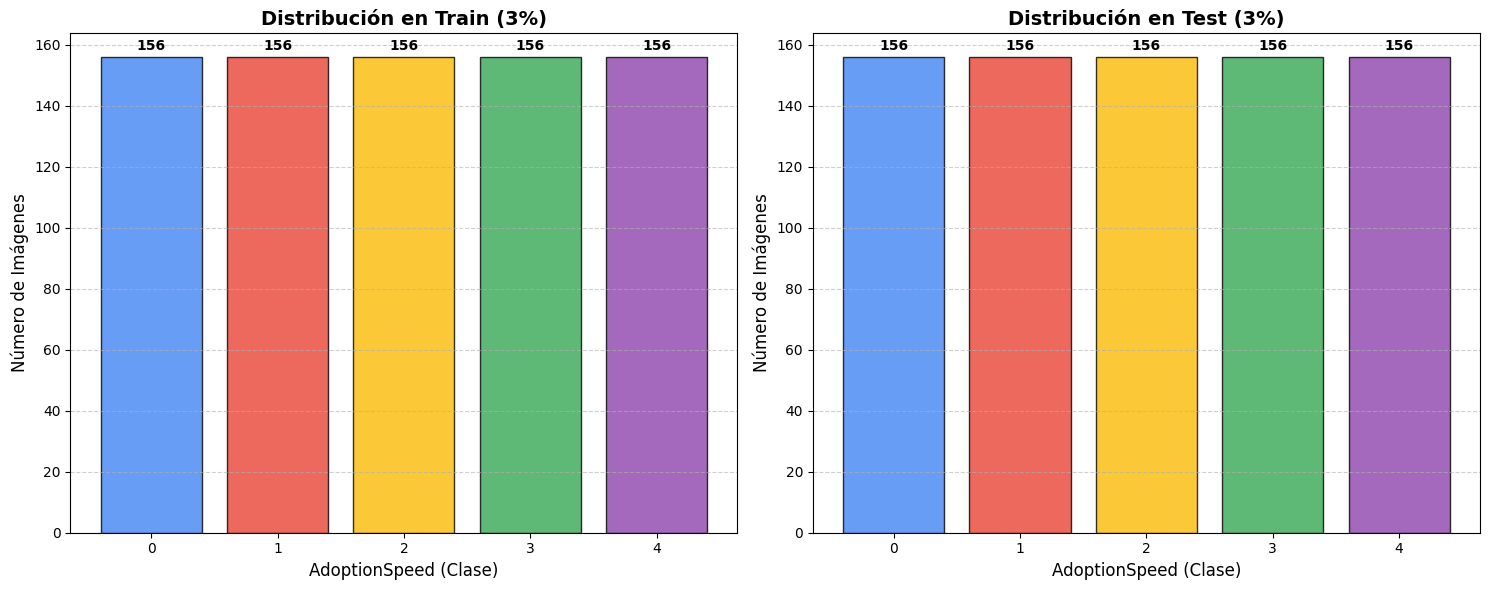

In [21]:
import matplotlib.pyplot as plt
import os
import seaborn as sns
import shutil
import random
from google.colab import drive

# Conectamos con Google Drive para acceder a las carpetas
drive.mount('/content/drive')

def crear_y_graficar_mini_dataset2(porcentaje=0.03):
    # Traducción de la ruta de Windows a la ruta de Google Colab
    base_dir = '/content/drive/MyDrive/Mascotas'
    origen = os.path.join(base_dir, 'datos tratados')
    destino = os.path.join(base_dir, 'mini_dataset')

    # Comprobación de existencia para evitar duplicar el proceso
    if not os.path.exists(destino):
        print(f"📂 Creando '{destino}' seleccionando el {porcentaje*100}% de imágenes...")

        sets = ['Train', 'Test']
        clases = ['0', '1', '2', '3', '4']

        for s in sets:
            for c in clases:
                path_origen = os.path.join(origen, s, c)
                path_destino = os.path.join(destino, s, c)

                if os.path.exists(path_origen):
                    # Creación de la estructura de subcarpetas por clase
                    os.makedirs(path_destino, exist_ok=True)

                    # Obtención de la lista de archivos de imagen
                    imagenes = [f for f in os.listdir(path_origen) if os.path.isfile(os.path.join(path_origen, f))]

                    # Cálculo del subconjunto (mínimo 1 imagen para evitar carpetas vacías)
                    cantidad_a_copiar = max(1, int(len(imagenes) * porcentaje)) if imagenes else 0

                    # Selección aleatoria para mantener la representatividad
                    seleccion = random.sample(imagenes, cantidad_a_copiar)

                    # Copia física de los archivos seleccionados
                    for img in seleccion:
                        shutil.copy(os.path.join(path_origen, img), os.path.join(path_destino, img))

        print("✅ Proceso de copia finalizado.")
    else:
        print(f"ℹ️ La carpeta 'mini_dataset' ya existe. Saltando creación.")

    # Invocación de la visualización sobre el nuevo subconjunto
    graficar_distribucion('mini_dataset')

def graficar_distribucion(nombre_carpeta='mini_dataset'):
    # Ajuste de rutas para entorno local o Drive
    base_path_local = nombre_carpeta
    base_path_drive = os.path.join('/content/drive/MyDrive/Mascotas', nombre_carpeta)

    if os.path.exists(base_path_local):
        base_path = base_path_local
    elif os.path.exists(base_path_drive):
        base_path = base_path_drive
    else:
        print(f"❌ No se encuentra la carpeta '{nombre_carpeta}'")
        return

    print(f"📊 Analizando distribución en: {os.path.abspath(base_path)}")

    sets = ['Train', 'Test']
    clases = ['0', '1', '2', '3', '4']
    colores = ['#4285F4', '#EA4335', '#FBBC05', '#34A853', '#8E44AD']

    fig, ax = plt.subplots(1, 2, figsize=(15, 6))

    for i, s in enumerate(sets):
        counts = []
        for c in clases:
            path = os.path.join(base_path, s, c)
            if os.path.exists(path):
                # Conteo de archivos válidos en cada directorio de clase
                counts.append(len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]))
            else:
                counts.append(0)

        # Generación del gráfico de barras
        bars = ax[i].bar(clases, counts, color=colores, edgecolor='black', alpha=0.8)
        ax[i].set_title(f'Distribución en {s} (3%)', fontsize=14, fontweight='bold')
        ax[i].set_xlabel('AdoptionSpeed (Clase)', fontsize=12)
        ax[i].set_ylabel('Número de Imágenes', fontsize=12)
        ax[i].grid(axis='y', linestyle='--', alpha=0.6)

        # Inserción de etiquetas numéricas sobre las barras
        for bar in bars:
            height = bar.get_height()
            ax[i].annotate(f'{height}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

# Ejecución del flujo de preparación de datos
crear_y_graficar_mini_dataset2()

### Exploración de hiperparámetros

En este bloque definimos una Red Neuronal Convolucional (CNN) sencilla encargada de extraer características visuales de las imágenes y clasificarlas en las 5 categorías. Configuramos un flujo de preprocesamiento que ajusta el tamaño de las imágenes a 224x224 píxeles y las normaliza para facilitar el aprendizaje del modelo, aunque con una red tan sencilla no esperamos obtener nada.


#### Learning Rates

Primero experimentaremos comparando varios de Learning Rates. Entrenamos el mismo modelo con tres ' lr ' distintas (0.001, 0.0001 y 0.00001) para observar cuál logra el mejor equilibrio entre rapidez y precisión. Al final, visualizamos la evolución de la pérdida y métricas como el Accuracy y el Kappa de Cohen (QWK) y con matrices de confusión para ver exactamente dónde se equivoca el modelo.


🚀 Iniciando Experimento: LR = 0.001


Entrenando LR 0.001: 100%|██████████| 20/20 [07:03<00:00, 21.19s/it]



🚀 Iniciando Experimento: LR = 0.0001


Entrenando LR 0.0001: 100%|██████████| 20/20 [07:10<00:00, 21.51s/it]



🚀 Iniciando Experimento: LR = 1e-05


Entrenando LR 1e-05: 100%|██████████| 20/20 [07:02<00:00, 21.11s/it]


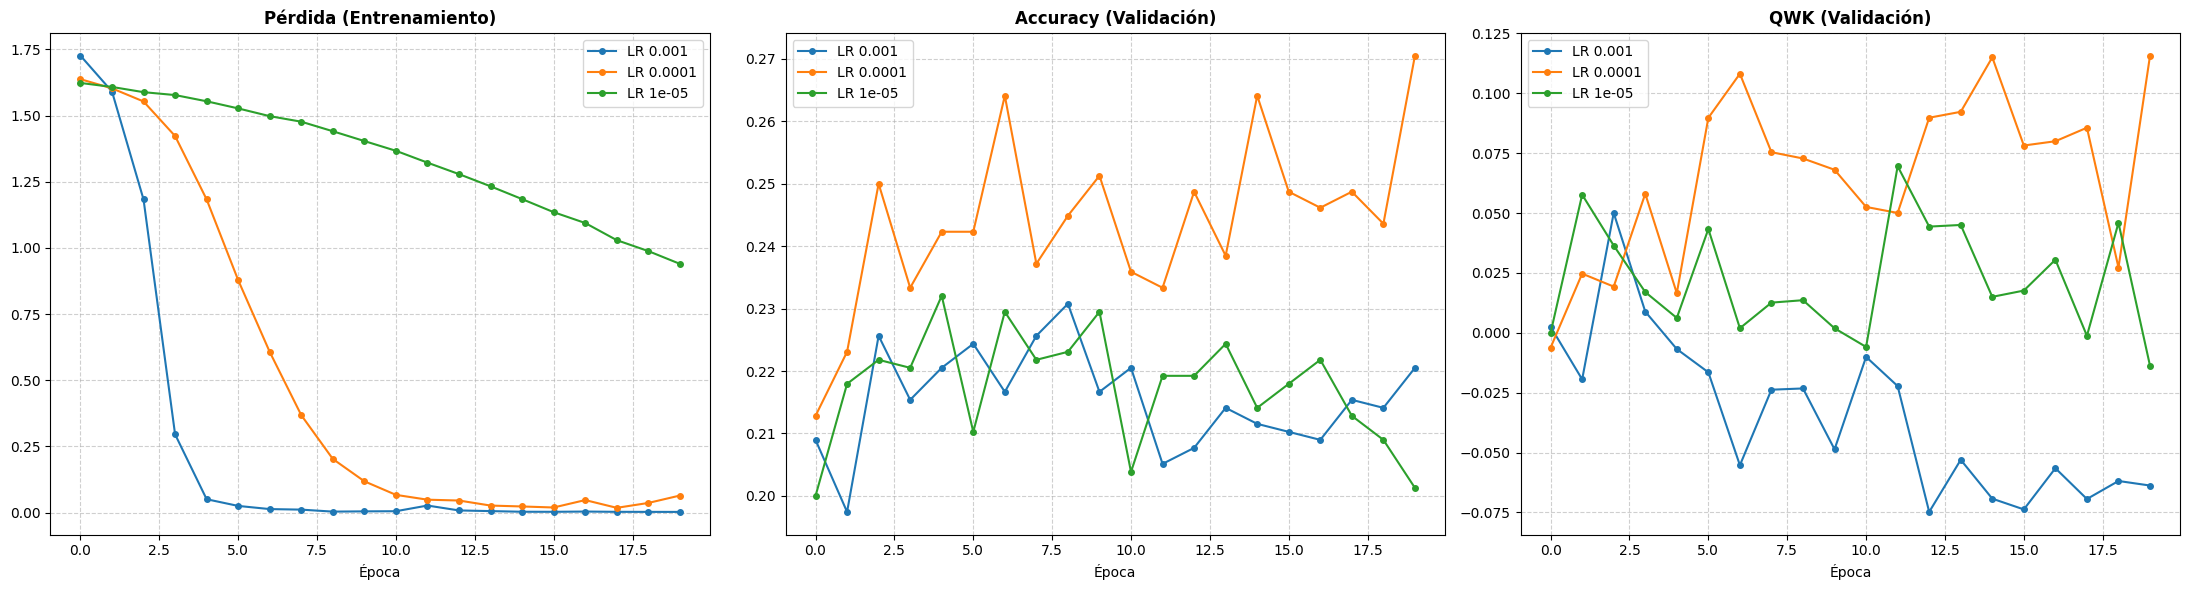

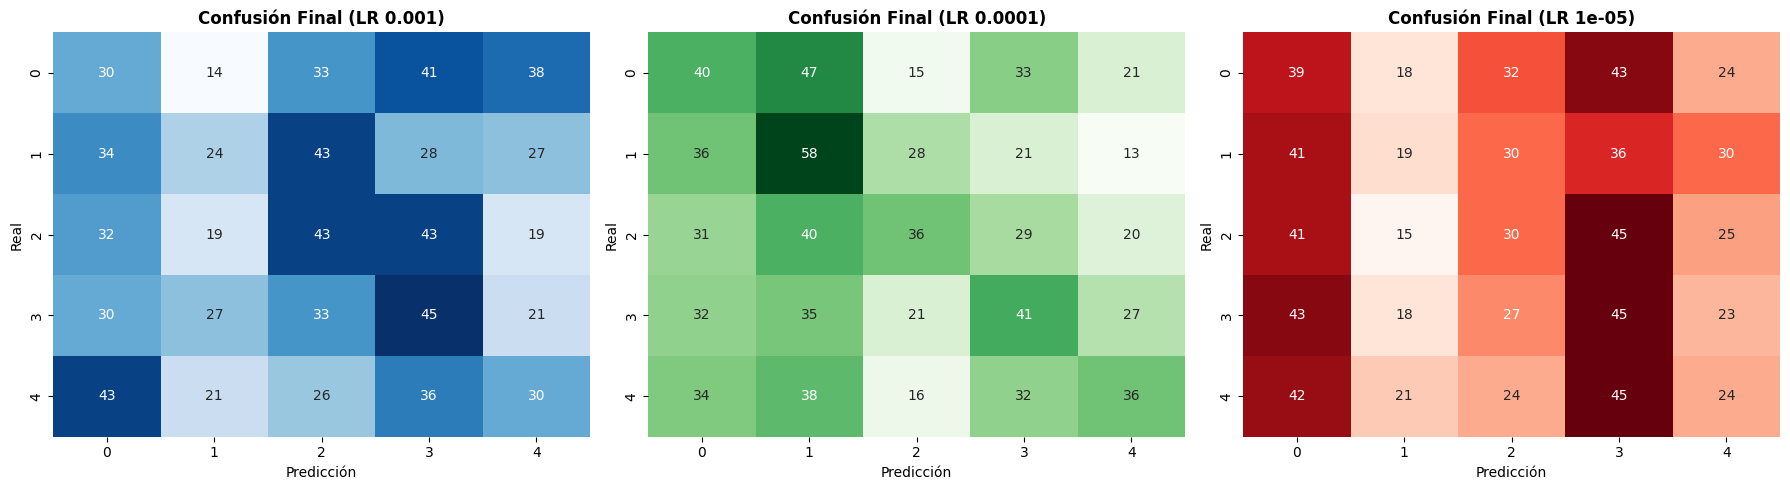


   RESUMEN FINAL: PICO MÁXIMO DE QWK POR LEARNING RATE


,Learning Rate,Mejor QWK,Época,Accuracy Asociado,Tiempo (s)
0,0.00100,0.0500,3,0.2256,61.16
1,0.00010,0.1157,20,0.2705,430.13
2,0.00001,0.0695,12,0.2192,256.28


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix
from tqdm.auto import tqdm

# Configuración de dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ARQUITECTURA CNN 
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 56 * 56, 128), nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.classifier(self.features(x))

# CONFIGURACIÓN DE DATOS
base_datos_drive = r'G:\Mi unidad\Mascotas\mini_dataset'
train_dir = os.path.join(base_datos_drive, 'Train')
test_dir = os.path.join(base_datos_drive, 'Test')

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)
val_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# EXPERIMENTO DE LEARNING RATES 
def exp_lr_comparison():
    lrs = [0.001, 0.0001, 0.00001]
    histories = {lr: {"loss": [], "acc": [], "qwk": [], "times": []} for lr in lrs}
    all_cms = []
    
    batch_size = 4
    num_epochs = 20
    criterion = nn.CrossEntropyLoss()

    for lr in lrs:
        print(f"\n🚀 Iniciando Experimento: LR = {lr}")
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        model = SimpleCNN().to(device)
        optimizer = optim.Adam(model.parameters(), lr=lr) 
        
        start_t = time.time()
        
        for epoch in tqdm(range(num_epochs), desc=f"Entrenando LR {lr}"):
            # FASE DE ENTRENAMIENTO 
            model.train()
            epoch_loss = 0
            for imgs, labels in train_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(imgs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()
            
            #  FASE DE VALIDACIÓN 
            model.eval()
            val_preds, val_targets = [], []
            with torch.no_grad():
                for imgs, labels in val_loader:
                    imgs, labels = imgs.to(device), labels.to(device)
                    out = model(imgs)
                    val_preds.extend(torch.max(out, 1)[1].cpu().tolist())
                    val_targets.extend(labels.cpu().tolist())
            
            # Guardar métricas
            histories[lr]["loss"].append(epoch_loss / len(train_loader))
            histories[lr]["acc"].append(accuracy_score(val_targets, val_preds))
            histories[lr]["qwk"].append(cohen_kappa_score(val_targets, val_preds, weights='quadratic'))
            histories[lr]["times"].append(time.time() - start_t)
        
        all_cms.append(confusion_matrix(val_targets, val_preds))

    # VISUALIZACIÓN DE EVOLUCIÓN 
    fig, axes = plt.subplots(1, 3, figsize=(22, 6))
    metrics_to_plot = ["loss", "acc", "qwk"]
    titles = ["Pérdida (Entrenamiento)", "Accuracy (Validación)", "QWK (Validación)"]
    
    for i, m in enumerate(metrics_to_plot):
        for lr in lrs:
            axes[i].plot(histories[lr][m], label=f"LR {lr}", marker='o', markersize=4)
        axes[i].set_title(titles[i], fontweight='bold')
        axes[i].set_xlabel('Época')
        axes[i].grid(True, linestyle='--', alpha=0.6)
        axes[i].legend()
    plt.tight_layout()
    plt.show()

    #  MATRICES DE CONFUSIÓN 
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    colors = ["Blues", "Greens", "Reds"]
    for i, lr in enumerate(lrs):
        sns.heatmap(all_cms[i], annot=True, fmt='d', ax=axes[i], cmap=colors[i], cbar=False)
        axes[i].set_title(f"Confusión Final (LR {lr})", fontweight='bold')
        axes[i].set_xlabel('Predicción')
        axes[i].set_ylabel('Real')
    plt.tight_layout()
    plt.show()

    # RESUMEN DE PICOS QWK 
    res_picos = []
    for lr in lrs:
        qwk_hist = np.array(histories[lr]["qwk"])
        acc_hist = np.array(histories[lr]["acc"])
        time_hist = np.array(histories[lr]["times"])
        
        # Encontrar el índice del valor máximo de QWK
        idx_pico = np.argmax(qwk_hist)
        
        res_picos.append({
            "Learning Rate": lr,
            "Mejor QWK": round(qwk_hist[idx_pico], 4),
            "Época": idx_pico + 1,
            "Accuracy Asociado": round(acc_hist[idx_pico], 4),
            "Tiempo (s)": round(time_hist[idx_pico], 2)
        })
        
    return pd.DataFrame(res_picos)

df_resumen = exp_lr_comparison()
print("\n" + "="*70)
print("   RESUMEN FINAL: PICO MÁXIMO DE QWK POR LEARNING RATE")
print("="*70)
display(df_resumen)

Los resultados muestran que en el entrenamiento:
- LR 0.001 es demasiado agresivo, haciendo que la pérdida caiga en picado pero destruyendo la capacidad de generalización (el QWK cae a valores negativos, lo que indica que predice peor que el azar);
- LR 1e-05 es excesivamente lento, mostrando una curva de pérdida casi lineal que sugiere que necesitaría muchísimas más épocas para llegar a algo sólido. 
- Sin embargo,el LR 0.0001 presenta una evolución más estable y alcanza los picos más altos tanto en Accuracy como en QWK.

Al observar las matrices de confusión, confirmamos que el modelo con LR 0.0001 es el que mejor logra "dibujar" la diagonal principal. Sin embargo, el rendimiento general sigue siendo bajo (Accuracy cercano al 27%), lo cual es normal considerando que estamos entrenando una red simple con apenas el 3% de los datos. 

#### Batch size

Estudiaremos ahora cómo influye el Batch Size en la estabilidad y convergencia de nuestra red. Al probar configuraciones de 4, 8 y 16 imágenes por iteración, analizamos la dinámica de las actualizaciones de gradiente bajo la función de pérdida CrossEntropyLoss. El objetivo es medir no solo la precisión final, sino también la eficiencia temporal y la estabilidad de la métrica QWK, determinando qué nivel de ruido estocástico beneficia más al modelo.



c:\Users\Equipo\Desktop\Machine_DL\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



🚀 Iniciando Experimento: Batch Size = 4


Progreso Total B=4: 100%|██████████| 20/20 [08:35<00:00, 25.79s/it, Loss=0.0170, QWK=0.0782]



🚀 Iniciando Experimento: Batch Size = 8


Progreso Total B=8: 100%|██████████| 20/20 [08:22<00:00, 25.11s/it, Loss=0.0241, QWK=0.0627]



🚀 Iniciando Experimento: Batch Size = 16


Progreso Total B=16: 100%|██████████| 20/20 [08:08<00:00, 24.41s/it, Loss=0.0204, QWK=0.0646]


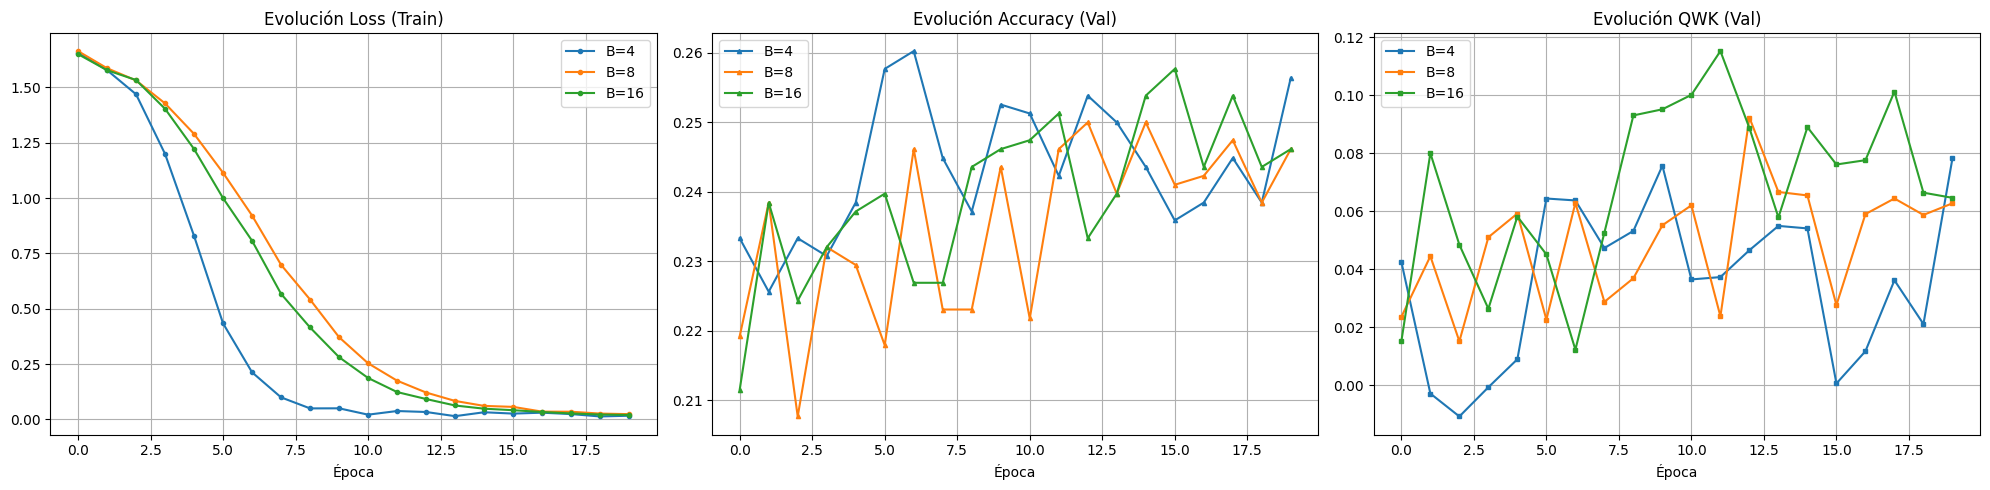


    RESUMEN FINAL: MEJOR RENDIMIENTO QWK POR BATCH SIZE (Cross Entropy)


,Batch Size,Mejor QWK,Época,Accuracy Asociado,Tiempo (s)
0,4,0.0782,20,0.2564,515.88
1,8,0.0922,13,0.2500,326.44
2,16,0.1152,12,0.2513,301.44


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix
from tqdm.auto import tqdm

# ARQUITECTURA CNN
# Definimos una red convolucional sencilla para procesar las imágenes de mascotas
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 56 * 56, 128), nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.classifier(self.features(x))

# CONFIGURACIÓN DE DATOS
# Establecemos las rutas y transformaciones necesarias para el preprocesamiento
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
base_datos_drive = r'G:\Mi unidad\Mascotas\mini_dataset'
train_dir = os.path.join(base_datos_drive, 'Train')
test_dir = os.path.join(base_datos_drive, 'Test')

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)
val_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Evaluamos cómo influye el tamaño de lote en la convergencia del modelo
def exp_batch_comparison():
    batch_sizes = [4, 8, 16]
    lr_fijo = 0.0001
    epochs = 20 
    
    # Historial para almacenar métricas por cada configuración de batch
    histories = {b: {"loss": [], "acc": [], "qwk": [], "times": []} for b in batch_sizes}
    all_cms = []

    for b_size in batch_sizes:
        print(f"\n🚀 Iniciando Experimento: Batch Size = {b_size}")
        train_loader = DataLoader(train_dataset, batch_size=b_size, shuffle=True)
        model = SimpleCNN().to(device)
        optimizer = optim.Adam(model.parameters(), lr=lr_fijo)
        
        # Sustituimos la pérdida anterior por CrossEntropyLoss estándar
        criterion = nn.CrossEntropyLoss()
        
        start_t = time.time()
        pbar = tqdm(range(epochs), desc=f"Progreso Total B={b_size}")
        
        for epoch in pbar:
            # Entrenamiento
            model.train()
            epoch_loss = 0
            for imgs, labels in train_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                optimizer.zero_grad(set_to_none=True)
                outputs = model(imgs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()
            
            # Validación por época
            model.eval()
            val_preds, val_targets = [], []
            with torch.no_grad():
                for imgs, labels in val_loader:
                    imgs, labels = imgs.to(device), labels.to(device)
                    out = model(imgs)
                    # Obtenemos la clase con mayor probabilidad
                    val_preds.extend(torch.max(out, 1)[1].cpu().tolist())
                    val_targets.extend(labels.cpu().tolist())
            
            # Registro de métricas para análisis posterior
            avg_loss = epoch_loss / len(train_loader)
            current_acc = accuracy_score(val_targets, val_preds)
            current_qwk = cohen_kappa_score(val_targets, val_preds, weights='quadratic')
            
            histories[b_size]["loss"].append(avg_loss)
            histories[b_size]["acc"].append(current_acc)
            histories[b_size]["qwk"].append(current_qwk)
            histories[b_size]["times"].append(time.time() - start_t)
            
            pbar.set_postfix({'Loss': f'{avg_loss:.4f}', 'QWK': f'{current_qwk:.4f}'})
        
        all_cms.append(confusion_matrix(val_targets, val_preds))

    # VISUALIZACIÓN DE EVOLUCIÓN
    # Generamos las gráficas comparativas de rendimiento
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    for b in batch_sizes:
        axes[0].plot(histories[b]["loss"], label=f'B={b}', marker='o', markersize=3)
        axes[1].plot(histories[b]["acc"], label=f'B={b}', marker='^', markersize=3)
        axes[2].plot(histories[b]["qwk"], label=f'B={b}', marker='s', markersize=3)
    
    axes[0].set_title('Evolución Loss (Train)'); axes[0].set_xlabel('Época'); axes[0].legend(); axes[0].grid(True)
    axes[1].set_title('Evolución Accuracy (Val)'); axes[1].set_xlabel('Época'); axes[1].legend(); axes[1].grid(True)
    axes[2].set_title('Evolución QWK (Val)'); axes[2].set_xlabel('Época'); axes[2].legend(); axes[2].grid(True)
    plt.tight_layout()
    plt.show()

    # RESUMEN DE MEJORES RESULTADOS
    # Extraemos el punto de mayor rendimiento para cada tamaño de batch
    res_list = []
    for b in batch_sizes:
        qwk_hist = np.array(histories[b]["qwk"])
        acc_hist = np.array(histories[b]["acc"])
        time_hist = np.array(histories[b]["times"])
        
        idx_pico = np.argmax(qwk_hist)
        
        res_list.append({
            "Batch Size": b,
            "Mejor QWK": round(qwk_hist[idx_pico], 4),
            "Época": idx_pico + 1,
            "Accuracy Asociado": round(acc_hist[idx_pico], 4),
            "Tiempo (s)": round(time_hist[idx_pico], 2)
        })
    
    return pd.DataFrame(res_list)

# Ejecución y visualización del resumen final
df_resumen_batches = exp_batch_comparison()
print("\n" + "="*75)
print("    RESUMEN FINAL: MEJOR RENDIMIENTO QWK POR BATCH SIZE (Cross Entropy)")
print("="*75)
display(df_resumen_batches)

Los resultados obtenidos muestran que el Batch Size 16 es la configuración más efectiva, alcanzando el mejor valor de QWK (0.1152) en casi la mitad de tiempo que el lote más pequeño. Se observa una tendencia clara: conforme aumentamos el tamaño del lote, el modelo no solo converge más rápido (alcanzando su pico en la época 12 frente a la 20), sino que también logra una mayor estabilidad en el aprendizaje. 


Sin embargo, el Accuracy se mantiene estancado en torno al 25% en todos los casos; esto sugiere que, aunque el tamaño de lote optimiza la eficiencia del entrenamiento, la arquitectura SimpleCNN por sí sola no es suficiente para capturar la complejidad del dataset, o almenos con esta versión reducida del mismo.

#### Loss Function

En este experimento evaluamos tres funciones de pérdida con naturalezas estadísticas distintas para determinar cuál captura mejor la jerarquía de las etiquetas. 
- CrossEntropyLoss es el estándar de clasificación que minimiza la divergencia entre distribuciones, pero trata las clases como categorías independientes (confundir 0 con 1 es tan grave como 0 con 4).
- MSE (Ordinal) transforma el problema en una regresión ponderada, calculando el valor esperado de la predicción ($\sum p_i \cdot i$) y penalizando la distancia euclídea al objetivo real.
- SoftKappa (QWKLoss), una función personalizada que utiliza una matriz de pesos cuadráticos $W_{ij} = (i-j)^2$ para penalizar los errores según su "lejanía" en la escala de adopción, diferenciando matemáticamente entre un error leve y uno camplio.

Esta comparativa es puede resultar útil porque el dataset de PetFinder es de naturaleza ordinal: la diferencia entre una adopción inmediata (0) y una tardía (4) representa un espectro temporal, no solo etiquetas distintas. Al integrar la noción de distancia en el entrenamiento, esperamos que el modelo deje de realizar predicciones aleatorias y comience a concentrar sus fallos cerca de la diagonal principal de la matriz de confusión. El objetivo es evualuar que función de perdida es capaz de obtener un valor de QWK superior.



🚀 Evaluando Loss: CrossEntropy


Progreso CrossEntropy: 100%|██████████| 20/20 [09:36<00:00, 28.85s/it, Loss=0.0269, QWK=-0.0070]



🚀 Evaluando Loss: MSE (Ordinal)


Progreso MSE (Ordinal): 100%|██████████| 20/20 [09:22<00:00, 28.13s/it, Loss=1.7710, QWK=0.0061] 



🚀 Evaluando Loss: SoftKappa (QWK)


Progreso SoftKappa (QWK): 100%|██████████| 20/20 [09:47<00:00, 29.36s/it, Loss=0.3974, QWK=0.0534]


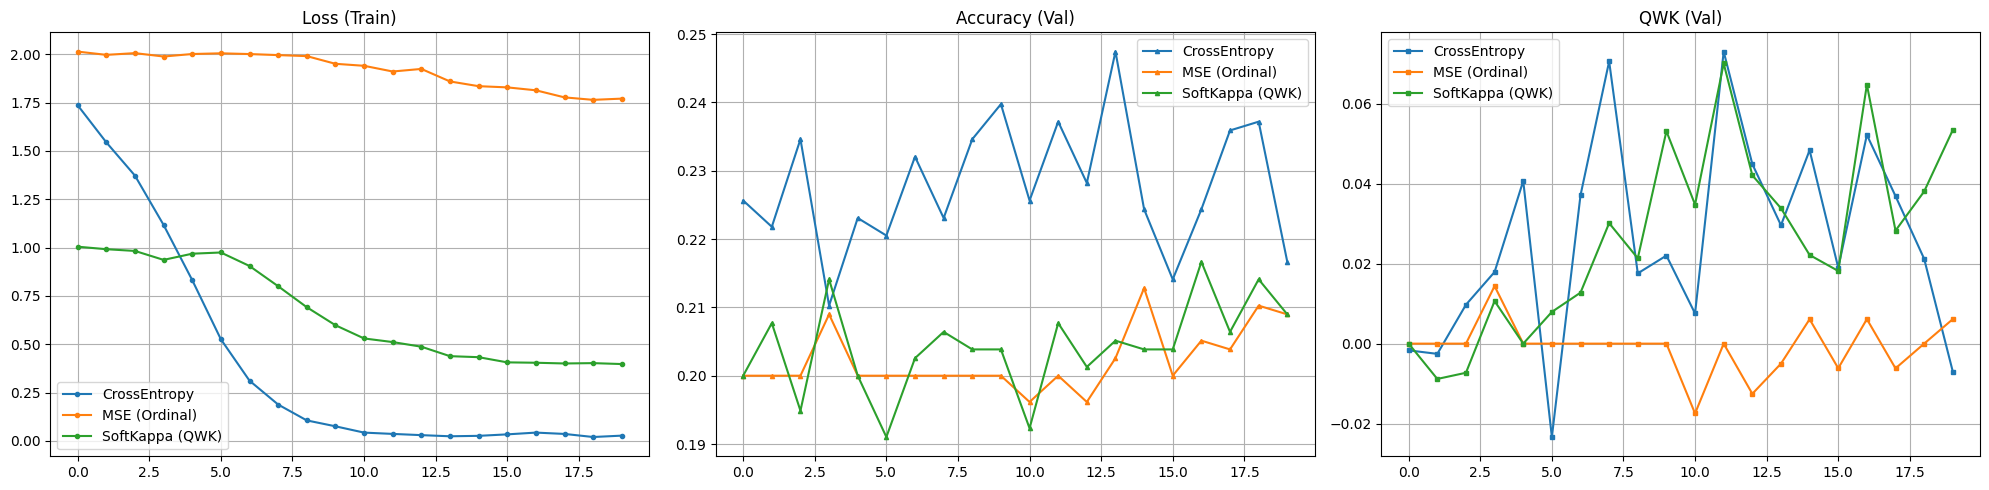

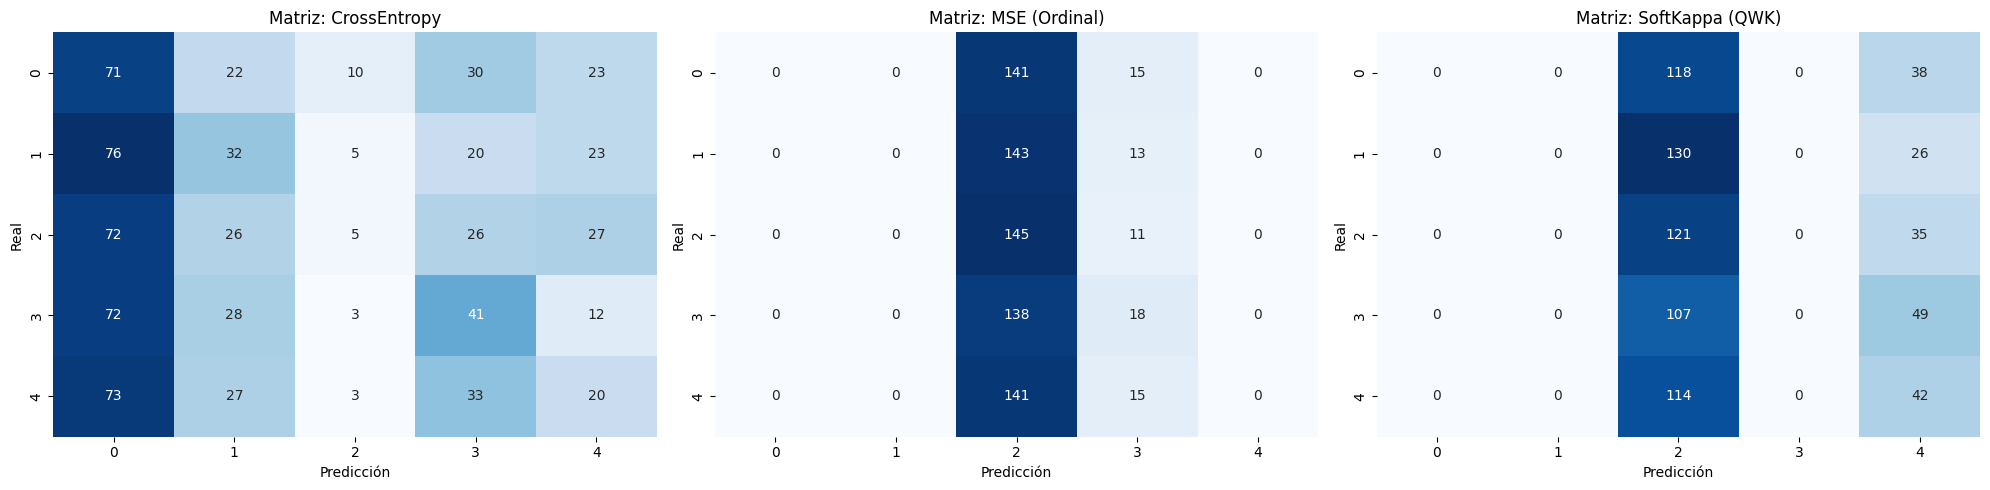


    COMPARATIVA FINAL DE RENDIMIENTO POR FUNCIÓN DE PÉRDIDA


,Loss Function,Mejor QWK,Época,Acc Asociado
0,CrossEntropy,0.0731,12,0.2372
1,MSE (Ordinal),0.0144,4,0.2090
2,SoftKappa (QWK),0.0701,12,0.2077


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix
from tqdm.auto import tqdm

# FUNCIÓN DE PÉRDIDA: SOFT KAPPA LOSS 
# Penaliza los errores de clasificación basándose en la distancia al objetivo real
class QWKLoss(nn.Module):
    def __init__(self, num_classes=5):
        super(QWKLoss, self).__init__()
        self.num_classes = num_classes
        i, j = torch.meshgrid(torch.arange(num_classes), torch.arange(num_classes), indexing='ij')
        self.weights = (i - j).pow(2).float()

    def forward(self, logits, targets):
        preds = torch.softmax(logits, dim=1)
        targets_oh = F.one_hot(targets, self.num_classes).float()
        
        observed = torch.matmul(targets_oh.t(), preds)
        hist_actual = targets_oh.sum(dim=0, keepdim=True)
        hist_pred = preds.sum(dim=0, keepdim=True)
        expected = torch.matmul(hist_actual.t(), hist_pred) / (preds.size(0) + 1e-8)
        
        w = self.weights.to(logits.device)
        loss = torch.sum(w * observed) / (torch.sum(w * expected) + 1e-8)
        return loss

# ARQUITECTURA CNN
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 56 * 56, 128), nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.classifier(self.features(x))

# CONFIGURACIÓN DE DATOS
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
base_datos_drive = r'G:\Mi unidad\Mascotas\mini_dataset'
train_dir = os.path.join(base_datos_drive, 'Train')
test_dir = os.path.join(base_datos_drive, 'Test')

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)
# Parametros fijos según solicitud
train_loader_fijo = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# EXPERIMENTO COMPARATIVO
def exp_loss_comparison():
    loss_names = ['CrossEntropy', 'MSE (Ordinal)', 'SoftKappa (QWK)']
    lr_fijo = 0.0001
    epochs = 20 
    
    histories = {name: {"loss": [], "acc": [], "qwk": [], "times": []} for name in loss_names}
    confusion_matrices = {}

    for name in loss_names:
        print(f"\n🚀 Evaluando Loss: {name}")
        model = SimpleCNN().to(device)
        optimizer = optim.Adam(model.parameters(), lr=lr_fijo)
        
        if name == 'CrossEntropy':
            criterion = nn.CrossEntropyLoss()
        elif name == 'MSE (Ordinal)':
            criterion = nn.MSELoss()
        else:
            criterion = QWKLoss(num_classes=5)
        
        start_t = time.time()
        pbar = tqdm(range(epochs), desc=f"Progreso {name}")
        
        for epoch in pbar:
            model.train()
            epoch_loss = 0
            for imgs, labels in train_loader_fijo:
                imgs, labels = imgs.to(device), labels.to(device)
                optimizer.zero_grad(set_to_none=True)
                outputs = model(imgs)
                
                if name == 'MSE (Ordinal)':
                    probs = torch.softmax(outputs, dim=1)
                    val_esperado = (probs * torch.arange(5).float().to(device)).sum(dim=1)
                    loss = criterion(val_esperado, labels.float())
                else:
                    loss = criterion(outputs, labels)
                    
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()
            
            # Validación
            model.eval()
            val_preds, val_targets = [], []
            with torch.no_grad():
                for imgs, labels in val_loader:
                    imgs, labels = imgs.to(device), labels.to(device)
                    out = model(imgs)
                    val_preds.extend(torch.max(out, 1)[1].cpu().tolist())
                    val_targets.extend(labels.cpu().tolist())
            
            # Cálculo de métricas
            avg_loss = epoch_loss / len(train_loader_fijo)
            current_acc = accuracy_score(val_targets, val_preds)
            current_qwk = cohen_kappa_score(val_targets, val_preds, weights='quadratic')
            
            histories[name]["loss"].append(avg_loss)
            histories[name]["acc"].append(current_acc)
            histories[name]["qwk"].append(current_qwk)
            histories[name]["times"].append(time.time() - start_t)
            
            pbar.set_postfix({'Loss': f'{avg_loss:.4f}', 'QWK': f'{current_qwk:.4f}'})
        
        # Guardar matriz de confusión final de este modelo
        confusion_matrices[name] = confusion_matrix(val_targets, val_preds)

    # VISUALIZACIÓN DE CURVAS DE APRENDIZAJE
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    for name in loss_names:
        axes[0].plot(histories[name]["loss"], label=name, marker='o', markersize=3)
        axes[1].plot(histories[name]["acc"], label=name, marker='^', markersize=3)
        axes[2].plot(histories[name]["qwk"], label=name, marker='s', markersize=3)
    
    axes[0].set_title('Loss (Train)'); axes[0].legend(); axes[0].grid(True)
    axes[1].set_title('Accuracy (Val)'); axes[1].legend(); axes[1].grid(True)
    axes[2].set_title('QWK (Val)'); axes[2].legend(); axes[2].grid(True)
    plt.tight_layout()
    plt.show()

    # VISUALIZACIÓN DE MATRICES DE CONFUSIÓN
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    for i, name in enumerate(loss_names):
        sns.heatmap(confusion_matrices[name], annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False)
        axes[i].set_title(f'Matriz: {name}')
        axes[i].set_xlabel('Predicción')
        axes[i].set_ylabel('Real')
    plt.tight_layout()
    plt.show()

    # RESUMEN DE RESULTADOS
    res_list = []
    for name in loss_names:
        qwk_hist = np.array(histories[name]["qwk"])
        acc_hist = np.array(histories[name]["acc"])
        idx_pico = np.argmax(qwk_hist)
        res_list.append({
            "Loss Function": name,
            "Mejor QWK": round(qwk_hist[idx_pico], 4),
            "Época": idx_pico + 1,
            "Acc Asociado": round(acc_hist[idx_pico], 4)
        })
    
    return pd.DataFrame(res_list)

# Lanzamiento del experimento
df_resumen_losses = exp_loss_comparison()
print("\n" + "="*75)
print("    COMPARATIVA FINAL DE RENDIMIENTO POR FUNCIÓN DE PÉRDIDA")
print("="*75)
display(df_resumen_losses)

Los resultados obtenidos nos revelan:

- CrossEntropy : Con un QWK de 0.0731, sigue siendo la opción más sólida. Esto se debe a que su superficie de error es mucho más suave y fácil de navegar para el optimizador Adam. Aunque no entiende que las clases están ordenadas, su capacidad para maximizar la probabilidad de la clase correcta compensa esa falta de "sensibilidad ordinal" en esta arquitectura simple.

- MSE Ordinal : Ha obtenido el peor rendimiento (QWK 0.0144). Al tratar las etiquetas como números continuos y calcular la media ponderada, el modelo tiende a volverse "conservador" y predecir constantemente las clases centrales (como la 2) para minimizar el error cuadrático. Esto colapsa la diversidad de las predicciones y arruina la métrica Kappa.

- SoftKappa: Se queda muy cerca de la CrossEntropy (QWK 0.0701). Es interesante notar que, aunque su Accuracy es menor (20.77%), su Kappa es competitivo. Esto significa que cuando se equivoca, lo hace "cerca" de la clase real, cumpliendo su objetivo matemático. Sin embargo, al ser una función de pérdida más compleja y menos convexa, suele requerir más épocas o un pre-entrenamiento con CrossEntropy para brillar realmente.

La arquitectura actual (SimpleCNN) es demasiado limitada para extraer patrones complejos, por lo que incluso con una pérdida optimizada para Kappa, no logra romper la barrera del azar significativo. Los resultados sugieren que el problema no es solo cómo medimos el error (Loss), sino la capacidad del modelo para ver las diferencias en las imágenes.

### Red con dataset completo

Tras las fases de experimentación, hemos concluido que la configuración óptima para nuestra arquitectura base consiste en un Learning Rate de 0.0001, un Batch Size de 16 y el uso de CrossEntropyLoss. Esta combinación ofrece el mejor equilibrio entre velocidad de convergencia y estabilidad del QWK, evitando el ruido excesivo de los lotes pequeños y superando el estancamiento de las tasas de aprendizaje más agresivas. Con estos cimientos establecidos, procedemos a escalar el entrenamiento al dataset completo, donde el mayor volumen de ejemplos permitirá a la red extraer patrones visuales mucho más robustos y representativos.


🚀 Iniciando Experimento: Batch Size = 4


B4 - Época 15/15: 100%|██████████| 10710/10710 [16:01<00:00, 11.14it/s]



🚀 Iniciando Experimento: Batch Size = 8


B8 - Época 15/15: 100%|██████████| 5355/5355 [13:25<00:00,  6.65it/s]


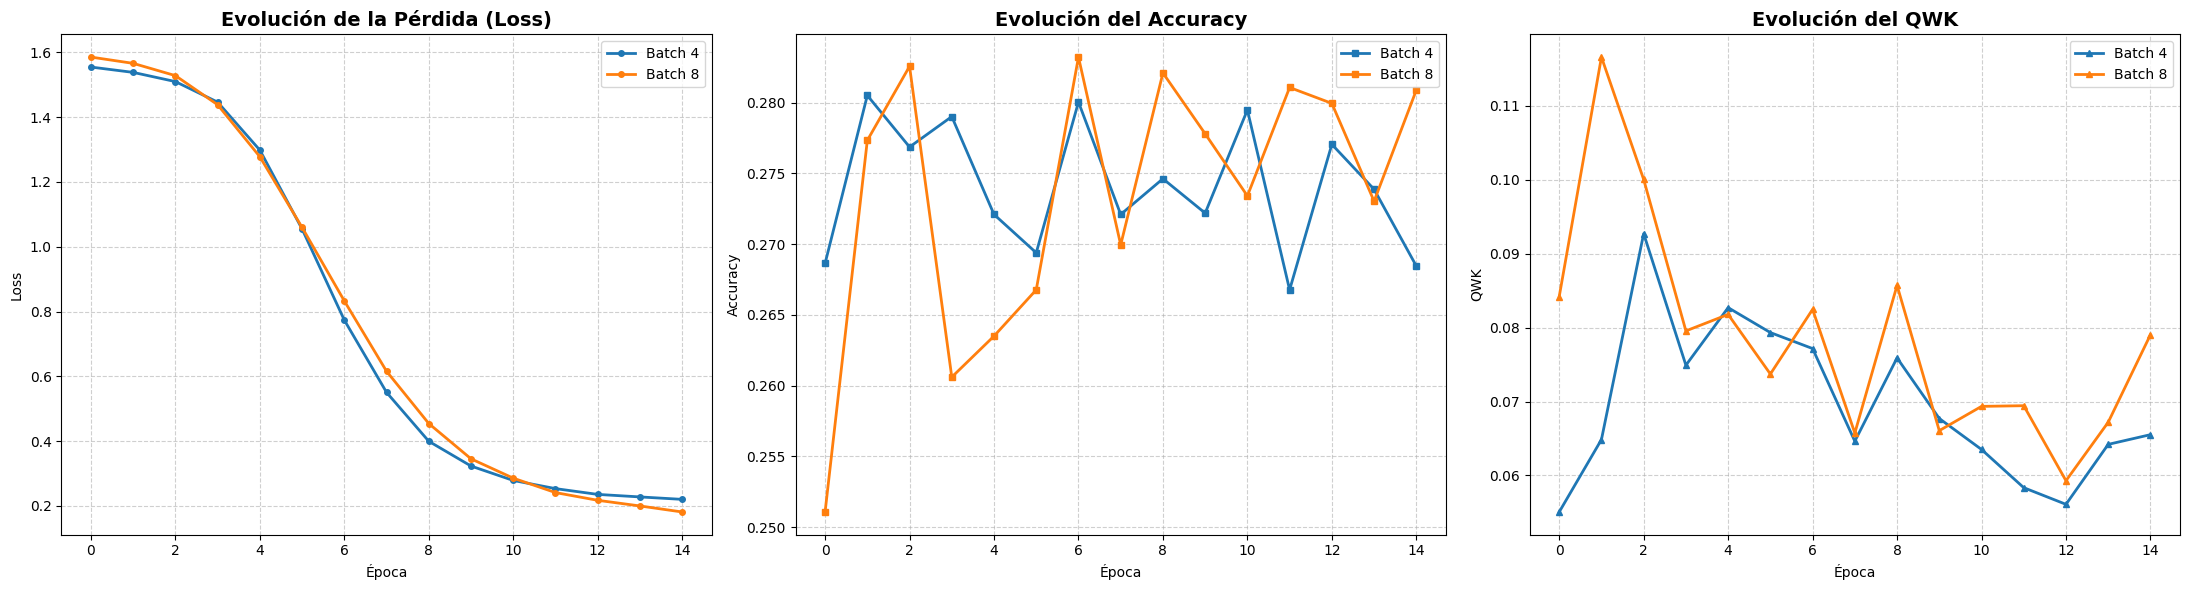


   RESUMEN FINAL: MEJOR RENDIMIENTO POR BATCH SIZE


,Batch Size,Mejor QWK,Época,Accuracy Asociado,Tiempo (s)
0,4,0.0927,3,0.2769,3357.18
1,8,0.1166,2,0.2773,2223.86


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.amp as amp
import os
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix

# ARQUITECTURA 
class PetNetScratch(nn.Module):
    def __init__(self, num_classes=5):
        super(PetNetScratch, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2), # 112x112
            nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2), # 56x56
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2) # 28x28
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # 128 canales * 28 * 28 de resolución = 100.352 neuronas
            nn.Linear(128 * 28 * 28, 256), nn.ReLU(), nn.Dropout(0.4),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.classifier(self.features(x))

# PREPARACIÓN DE DIRECTORIOS Y DATOS 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
folder_modelos = '../modelos'
if not os.path.exists(folder_modelos):
    os.makedirs(folder_modelos)

# Transformación coherente con la arquitectura
transform_224 = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Carga de datasets (asegúrate que las rutas sean correctas)
base_datos_drive = r'G:\Mi unidad\Mascotas\datos tratados'
train_dataset = datasets.ImageFolder(os.path.join(base_datos_drive, 'Train'), transform=transform_224)
val_dataset = datasets.ImageFolder(os.path.join(base_datos_drive, 'Test'), transform=transform_224)

# Cálculo de pesos para balanceo de clases
targets = torch.tensor(train_dataset.targets)
class_count = torch.tensor([(targets == t).sum() for t in torch.unique(targets)])
weights = (1. / class_count.float()).to(device)

# EXPERIMENTO COMPARATIVO 
batch_sizes = [4, 8]
epochs = 15
all_histories = {}
resumen_final = []
scaler = amp.GradScaler('cuda')

for b_size in batch_sizes:
    print(f"\n🚀 Iniciando Experimento: Batch Size = {b_size}")
    
    train_loader = DataLoader(train_dataset, batch_size=b_size, shuffle=True, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, pin_memory=True)
    
    model = PetNetScratch(num_classes=5).to(device)
    criterion = nn.CrossEntropyLoss(weight=weights)
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    
    historia = {"loss": [], "qwk": [], "acc": [], "time": []}
    best_qwk_val = -1.0
    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0
        for inputs, labels in tqdm(train_loader, desc=f"B{b_size} - Época {epoch+1}/{epochs}"):
            inputs, labels = inputs.to(device, non_blocking=True), labels.to(device, non_blocking=True)
            
            optimizer.zero_grad(set_to_none=True)
            with amp.autocast('cuda'):
                outputs = model(inputs)
                loss = criterion(outputs, labels)
            
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            epoch_loss += loss.item()

        # Validación por época
        model.eval()
        all_preds, all_labels = [], []
        with torch.no_grad():
            for inputs, labels in val_loader:
                with amp.autocast('cuda'):
                    outputs = model(inputs.to(device, non_blocking=True))
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.numpy())

        current_acc = accuracy_score(all_labels, all_preds)
        current_qwk = cohen_kappa_score(all_labels, all_preds, weights='quadratic')
        
        historia["loss"].append(epoch_loss / len(train_loader))
        historia["acc"].append(current_acc)
        historia["qwk"].append(current_qwk)
        historia["time"].append(time.time() - start_time)

        # Guardar mejor modelo del experimento actual
        if current_qwk > best_qwk_val:
            best_qwk_val = current_qwk
            torch.save(model.state_dict(), os.path.join(folder_modelos, f'mejor_modelo_B{b_size}.pth'))

    all_histories[b_size] = historia
    
    # Registro del pico de rendimiento para la tabla final
    idx_mejor = np.argmax(historia["qwk"])
    resumen_final.append({
        "Batch Size": b_size,
        "Mejor QWK": round(historia["qwk"][idx_mejor], 4),
        "Época": idx_mejor + 1,
        "Accuracy Asociado": round(historia["acc"][idx_mejor], 4),
        "Tiempo (s)": round(historia["time"][idx_mejor], 2)
    })

# VISUALIZACIÓN HOLD ON (Superposición de curvas)
fig, axes = plt.subplots(1, 3, figsize=(22, 6))
colores = {4: '#1f77b4', 8: '#ff7f0e'}

for b in batch_sizes:
    axes[0].plot(all_histories[b]["loss"], label=f'Batch {b}', color=colores[b], lw=2, marker='o', markersize=4)
    axes[1].plot(all_histories[b]["acc"], label=f'Batch {b}', color=colores[b], lw=2, marker='s', markersize=4)
    axes[2].plot(all_histories[b]["qwk"], label=f'Batch {b}', color=colores[b], lw=2, marker='^', markersize=4)

# Configuración de estéticas
titulos = ['Evolución de la Pérdida (Loss)', 'Evolución del Accuracy', 'Evolución del QWK']
y_labels = ['Loss', 'Accuracy', 'QWK']

for i, ax in enumerate(axes):
    ax.set_title(titulos[i], fontsize=14, fontweight='bold')
    ax.set_xlabel('Época')
    ax.set_ylabel(y_labels[i])
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

#  TABLA DE RESUMEN FINAL 
df_resumen = pd.DataFrame(resumen_final)
print("\n" + "="*75)
print("   RESUMEN FINAL: MEJOR RENDIMIENTO POR BATCH SIZE")
print("="*75)
display(df_resumen)


🚀 Iniciando Entrenamiento: Batch Size = 16


B16 - Época 10/10: 100%|██████████| 2678/2678 [19:11<00:00,  2.33it/s]


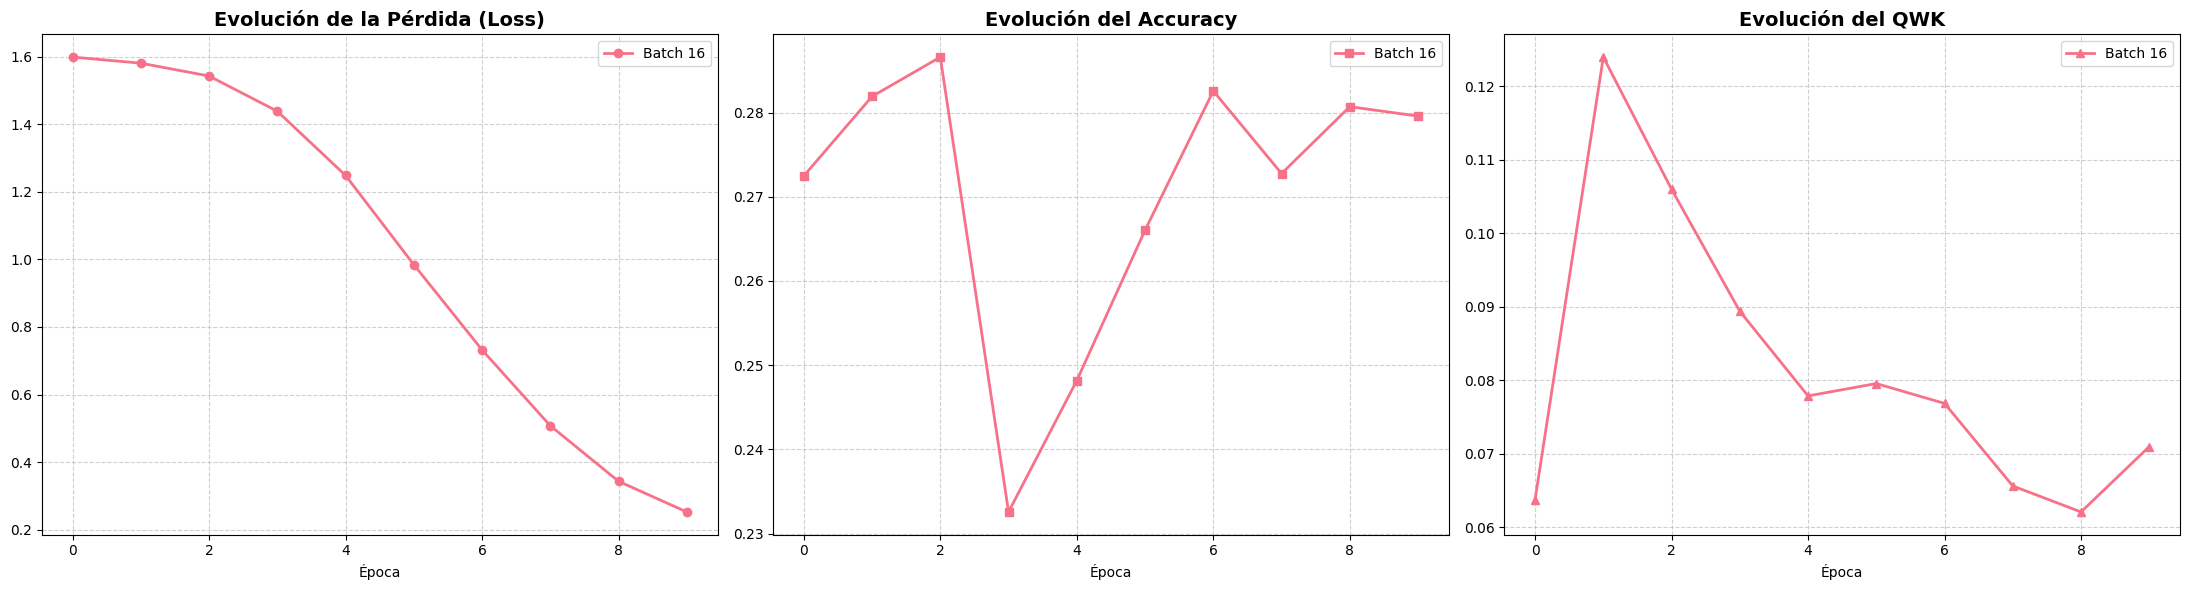

C:\Users\Equipo\AppData\Local\Temp\ipykernel_19952\4058752944.py:145: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(folder_mode

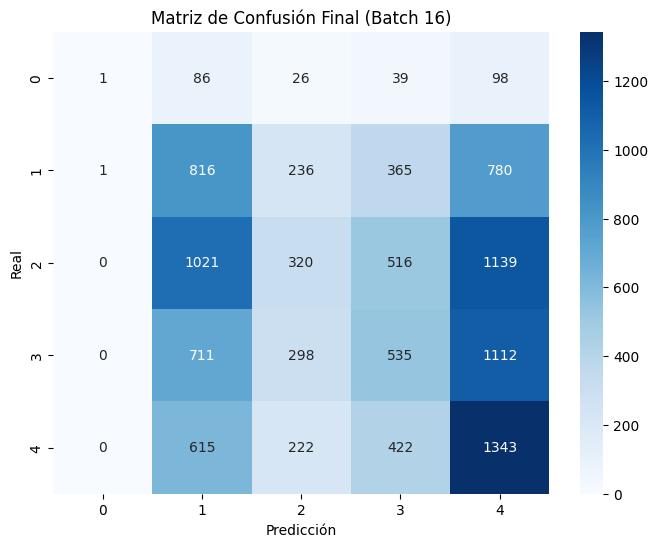


   RESUMEN FINAL: RENDIMIENTO BATCH SIZE 16
   Batch Size  Mejor QWK  Época  Accuracy Asociado  Tiempo (s)
0          16      0.124      2             0.2819     2764.61


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.amp as amp
import os
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix

# ARQUITECTURA SINCRONIZADA 
class PetNetScratch(nn.Module):
    def __init__(self, num_classes=5):
        super(PetNetScratch, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 256), nn.ReLU(), nn.Dropout(0.4),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.classifier(self.features(x))

# PREPARACIÓN DE DIRECTORIOS Y DATOS 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
folder_modelos = '../modelos'
if not os.path.exists(folder_modelos):
    os.makedirs(folder_modelos)

transform_224 = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

base_datos_drive = r'G:\Mi unidad\Mascotas\datos tratados'
train_dataset = datasets.ImageFolder(os.path.join(base_datos_drive, 'Train'), transform=transform_224)
val_dataset = datasets.ImageFolder(os.path.join(base_datos_drive, 'Test'), transform=transform_224)

targets = torch.tensor(train_dataset.targets)
class_count = torch.tensor([(targets == t).sum() for t in torch.unique(targets)])
weights = (1. / class_count.float()).to(device)

# EXPERIMENTO (SOLO BATCH 16) 
batch_sizes = [16]
epochs = 10
all_histories = {}
resumen_final = []
scaler = amp.GradScaler('cuda')

for b_size in batch_sizes:
    print(f"\n🚀 Iniciando Entrenamiento: Batch Size = {b_size}")
    
    train_loader = DataLoader(train_dataset, batch_size=b_size, shuffle=True, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, pin_memory=True)
    
    model = PetNetScratch(num_classes=5).to(device)
    criterion = nn.CrossEntropyLoss(weight=weights)
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    
    historia = {"loss": [], "qwk": [], "acc": [], "time": []}
    best_qwk_val = -1.0
    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0
        for inputs, labels in tqdm(train_loader, desc=f"B{b_size} - Época {epoch+1}/{epochs}"):
            inputs, labels = inputs.to(device, non_blocking=True), labels.to(device, non_blocking=True)
            
            optimizer.zero_grad(set_to_none=True)
            with amp.autocast('cuda'):
                outputs = model(inputs)
                loss = criterion(outputs, labels)
            
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            epoch_loss += loss.item()

        model.eval()
        all_preds, all_labels = [], []
        with torch.no_grad():
            for inputs, labels in val_loader:
                with amp.autocast('cuda'):
                    outputs = model(inputs.to(device, non_blocking=True))
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.numpy())

        current_acc = accuracy_score(all_labels, all_preds)
        current_qwk = cohen_kappa_score(all_labels, all_preds, weights='quadratic')
        
        historia["loss"].append(epoch_loss / len(train_loader))
        historia["acc"].append(current_acc)
        historia["qwk"].append(current_qwk)
        historia["time"].append(time.time() - start_time)

        if current_qwk > best_qwk_val:
            best_qwk_val = current_qwk
            torch.save(model.state_dict(), os.path.join(folder_modelos, f'mejor_modelo_B{b_size}.pth'))

    all_histories[b_size] = historia
    
    idx_mejor = np.argmax(historia["qwk"])
    resumen_final.append({
        "Batch Size": b_size,
        "Mejor QWK": round(historia["qwk"][idx_mejor], 4),
        "Época": idx_mejor + 1,
        "Accuracy Asociado": round(historia["acc"][idx_mejor], 4),
        "Tiempo (s)": round(historia["time"][idx_mejor], 2)
    })

# VISUALIZACIÓN DE MÉTRICAS 
fig, axes = plt.subplots(1, 3, figsize=(22, 6))
palette = sns.color_palette("husl", len(batch_sizes))
colores_dinamicos = {b: palette[i] for i, b in enumerate(batch_sizes)}

for b in batch_sizes:
    axes[0].plot(all_histories[b]["loss"], label=f'Batch {b}', color=colores_dinamicos[b], lw=2, marker='o')
    axes[1].plot(all_histories[b]["acc"], label=f'Batch {b}', color=colores_dinamicos[b], lw=2, marker='s')
    axes[2].plot(all_histories[b]["qwk"], label=f'Batch {b}', color=colores_dinamicos[b], lw=2, marker='^')

titulos = ['Evolución de la Pérdida (Loss)', 'Evolución del Accuracy', 'Evolución del QWK']
for i, ax in enumerate(axes):
    ax.set_title(titulos[i], fontsize=14, fontweight='bold')
    ax.set_xlabel('Época')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# MATRIZ DE CONFUSIÓN
model.load_state_dict(torch.load(os.path.join(folder_modelos, f'mejor_modelo_B16.pth')))
model.eval()
final_preds, final_labels = [], []

with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs.to(device))
        _, preds = torch.max(outputs, 1)
        final_preds.extend(preds.cpu().numpy())
        final_labels.extend(labels.numpy())

cm = confusion_matrix(final_labels, final_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.title('Matriz de Confusión Final (Batch 16)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

#  TABLA DE RESUMEN FINAL 
df_resumen = pd.DataFrame(resumen_final)
print("\n" + "="*75)
print("   RESUMEN FINAL: RENDIMIENTO BATCH SIZE 16")
print("="*75)
print(df_resumen)

## Redes pre-entrenadas


Epoch 1/20:   0%|          | 0/1339 [00:00<?, ?it/s]

Epoch 2/20:   0%|          | 0/1339 [00:00<?, ?it/s]

Epoch 3/20:   0%|          | 0/1339 [00:00<?, ?it/s]

Epoch 4/20:   0%|          | 0/1339 [00:00<?, ?it/s]

Epoch 5/20:   0%|          | 0/1339 [00:00<?, ?it/s]

Epoch 6/20:   0%|          | 0/1339 [00:00<?, ?it/s]

Epoch 7/20:   0%|          | 0/1339 [00:00<?, ?it/s]

Epoch 8/20:   0%|          | 0/1339 [00:00<?, ?it/s]

Epoch 9/20:   0%|          | 0/1339 [00:00<?, ?it/s]

Epoch 10/20:   0%|          | 0/1339 [00:00<?, ?it/s]

Epoch 11/20:   0%|          | 0/1339 [00:00<?, ?it/s]

Epoch 12/20:   0%|          | 0/1339 [00:00<?, ?it/s]

Epoch 13/20:   0%|          | 0/1339 [00:00<?, ?it/s]

Epoch 14/20:   0%|          | 0/1339 [00:00<?, ?it/s]

Epoch 15/20:   0%|          | 0/1339 [00:00<?, ?it/s]

Epoch 16/20:   0%|          | 0/1339 [00:00<?, ?it/s]

Epoch 17/20:   0%|          | 0/1339 [00:00<?, ?it/s]

Epoch 18/20:   0%|          | 0/1339 [00:00<?, ?it/s]

Epoch 19/20:   0%|          | 0/1339 [00:00<?, ?it/s]

Epoch 20/20:   0%|          | 0/1339 [00:00<?, ?it/s]

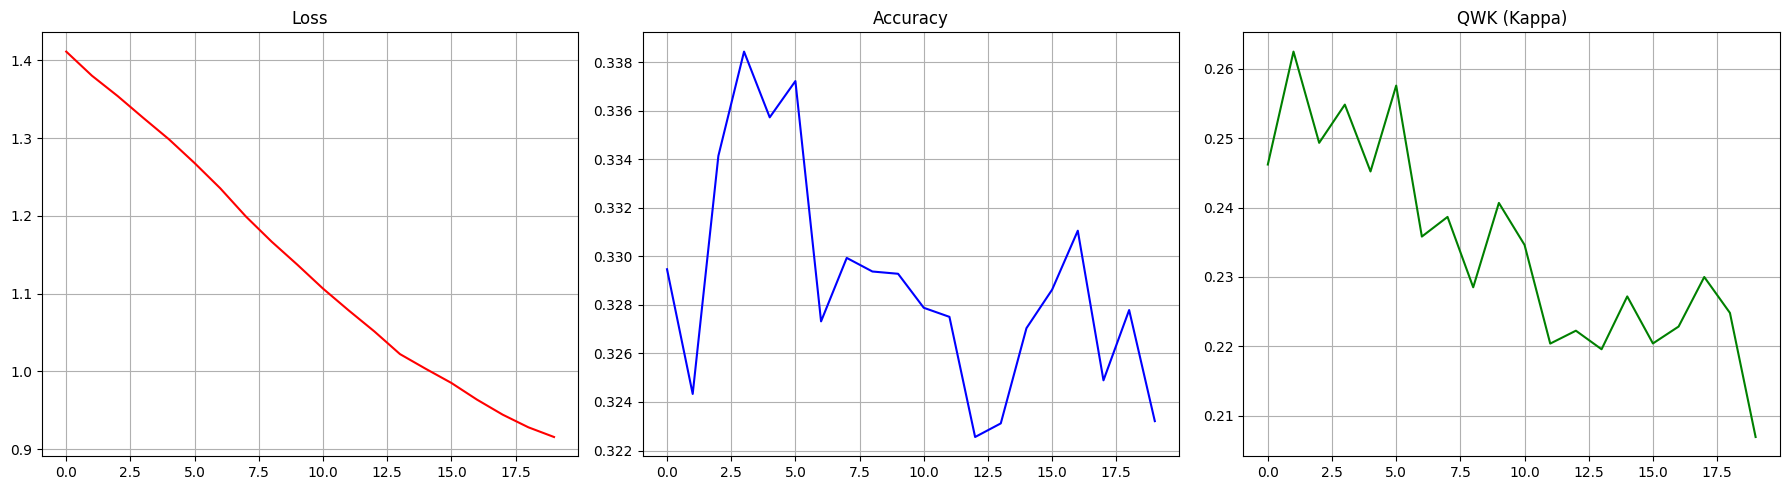

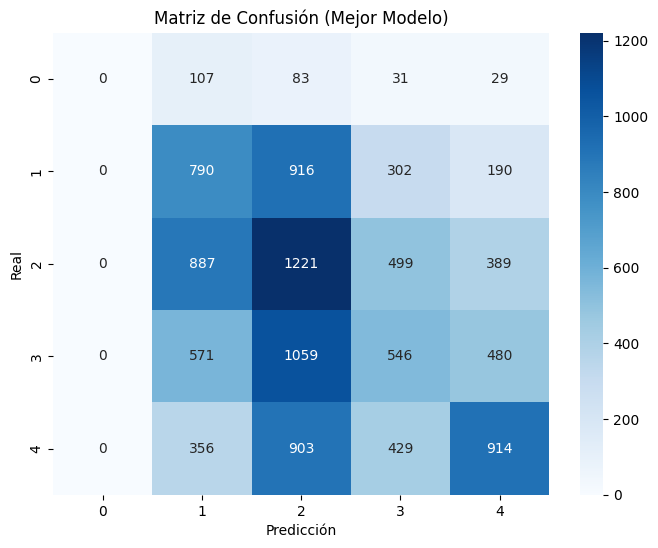


📊 RESUMEN DEL MEJOR MODELO (CRITERIO QWK):
 Mejor QWK  Época  Accuracy Asociado  Tiempo (s)
   0.26249      2            0.32433       55.85


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import os
import time
import shutil
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix
from google.colab import drive

# Optimización para hardware Ampere 
torch.set_float32_matmul_precision('high')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Gestión de datos (carga solo si es necesario)
local_path = '/content/dataset_local'
if not os.path.exists(local_path):
    print("🚀 Transfiriendo datos al SSD local...")
    drive.mount('/content/drive')
    shutil.copytree('/content/drive/MyDrive/Mascotas/datos tratados', local_path)

# Transformaciones
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_ds = datasets.ImageFolder(os.path.join(local_path, 'Train'), transform=transform)
test_ds = datasets.ImageFolder(os.path.join(local_path, 'Test'), transform=transform)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=4, pin_memory=True, persistent_workers=True)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False, num_workers=4, pin_memory=True, persistent_workers=True)

# Modelo Preentrenado (ResNet50)
def get_resnet_model(num_classes=5):
    model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
    for param in model.parameters():
        param.requires_grad = False
    model.fc = nn.Sequential(
        nn.Linear(model.fc.in_features, 256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, num_classes)
    )
    return model.to(device)

# Entrenamiento
def train_petfinder(model, epochs=20):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

    history = {'loss': [], 'acc': [], 'qwk': []}
    best_qwk = -1
    best_row = {}

    for epoch in range(epochs):
        start_t = time.time()
        model.train()
        t_loss = 0

        for imgs, lbls in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", leave=False):
            imgs, lbls = imgs.to(device), lbls.to(device)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, lbls)
            loss.backward()
            optimizer.step()
            t_loss += loss.item()

        # Evaluación
        model.eval()
        preds, targets = [], []
        with torch.no_grad():
            for imgs, lbls in test_loader:
                imgs, lbls = imgs.to(device), lbls.to(device)
                out = model(imgs)
                preds.extend(out.argmax(1).cpu().numpy())
                targets.extend(lbls.cpu().numpy())

        acc = accuracy_score(targets, preds)
        qwk = cohen_kappa_score(targets, preds, weights='quadratic')
        duration = time.time() - start_t

        history['loss'].append(t_loss/len(train_loader))
        history['acc'].append(acc)
        history['qwk'].append(qwk)

        if qwk > best_qwk:
            best_qwk = qwk
            torch.save(model.state_dict(), 'best_model_qwk_2.pth')
            best_row = {'Mejor QWK': round(qwk, 5), 'Época': epoch + 1, 'Accuracy Asociado': round(acc, 5), 'Tiempo (s)': round(duration, 2)}

    return history, best_row

# Ejecutar proceso
model = get_resnet_model()
history, summary = train_petfinder(model, epochs=20)

# Gráficas de evolución (1x3)
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].plot(history['loss'], 'r-'); ax[0].set_title('Loss'); ax[0].grid(True)
ax[1].plot(history['acc'], 'b-'); ax[1].set_title('Accuracy'); ax[1].grid(True)
ax[2].plot(history['qwk'], 'g-'); ax[2].set_title('QWK (Kappa)'); ax[2].grid(True)
plt.tight_layout()
plt.show()

# Matriz de Confusión del mejor modelo
model.load_state_dict(torch.load('best_model_qwk_2.pth'))
model.eval()
final_preds, final_targets = [], []
with torch.no_grad():
    for imgs, lbls in test_loader:
        imgs, lbls = imgs.to(device), lbls.to(device)
        out = model(imgs)
        final_preds.extend(out.argmax(1).cpu().numpy())
        final_targets.extend(lbls.cpu().numpy())

cm = confusion_matrix(final_targets, final_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_ds.classes, yticklabels=train_ds.classes)
plt.xlabel('Predicción'); plt.ylabel('Real')
plt.title('Matriz de Confusión (Mejor Modelo)')
plt.show()

#  Tabla Resumen
print("\n📊 RESUMEN DEL MEJOR MODELO (CRITERIO QWK):")
print(pd.DataFrame([summary]).to_string(index=False))

## Ensamble methods


🔥 Entrenando Experto Clase 0 (ResNet50 + Fine-tuning)


C0 | Ep 1: 100%|██████████| 98/98 [00:21<00:00,  4.48it/s]
C0 | Ep 2: 100%|██████████| 98/98 [00:22<00:00,  4.30it/s]
C0 | Ep 3: 100%|██████████| 98/98 [00:21<00:00,  4.48it/s]
C0 | Ep 4: 100%|██████████| 98/98 [00:29<00:00,  3.37it/s]
C0 | Ep 5: 100%|██████████| 98/98 [00:35<00:00,  2.74it/s]
C0 | Ep 6: 100%|██████████| 98/98 [00:39<00:00,  2.51it/s]
C0 | Ep 7: 100%|██████████| 98/98 [00:44<00:00,  2.20it/s]
C0 | Ep 8: 100%|██████████| 98/98 [00:41<00:00,  2.34it/s]
C0 | Ep 9: 100%|██████████| 98/98 [00:40<00:00,  2.44it/s]
C0 | Ep 10: 100%|██████████| 98/98 [00:39<00:00,  2.48it/s]
C0 | Ep 11: 100%|██████████| 98/98 [00:41<00:00,  2.37it/s]
C0 | Ep 12: 100%|██████████| 98/98 [00:40<00:00,  2.44it/s]



🔥 Entrenando Experto Clase 1 (ResNet50 + Fine-tuning)


C1 | Ep 1: 100%|██████████| 98/98 [00:41<00:00,  2.35it/s]
C1 | Ep 2: 100%|██████████| 98/98 [00:42<00:00,  2.33it/s]
C1 | Ep 3: 100%|██████████| 98/98 [00:41<00:00,  2.35it/s]
C1 | Ep 4: 100%|██████████| 98/98 [00:42<00:00,  2.29it/s]
C1 | Ep 5: 100%|██████████| 98/98 [00:44<00:00,  2.20it/s]
C1 | Ep 6: 100%|██████████| 98/98 [00:42<00:00,  2.32it/s]
C1 | Ep 7: 100%|██████████| 98/98 [00:43<00:00,  2.26it/s]
C1 | Ep 8: 100%|██████████| 98/98 [00:41<00:00,  2.35it/s]
C1 | Ep 9: 100%|██████████| 98/98 [00:40<00:00,  2.43it/s]
C1 | Ep 10: 100%|██████████| 98/98 [00:39<00:00,  2.45it/s]
C1 | Ep 11: 100%|██████████| 98/98 [00:42<00:00,  2.28it/s]
C1 | Ep 12: 100%|██████████| 98/98 [00:40<00:00,  2.43it/s]



🔥 Entrenando Experto Clase 2 (ResNet50 + Fine-tuning)


C2 | Ep 1: 100%|██████████| 98/98 [00:38<00:00,  2.51it/s]
C2 | Ep 2: 100%|██████████| 98/98 [00:45<00:00,  2.17it/s]
C2 | Ep 3: 100%|██████████| 98/98 [00:39<00:00,  2.45it/s]
C2 | Ep 4: 100%|██████████| 98/98 [00:40<00:00,  2.44it/s]
C2 | Ep 5: 100%|██████████| 98/98 [00:41<00:00,  2.34it/s]
C2 | Ep 6: 100%|██████████| 98/98 [00:45<00:00,  2.16it/s]
C2 | Ep 7: 100%|██████████| 98/98 [00:44<00:00,  2.22it/s]
C2 | Ep 8: 100%|██████████| 98/98 [00:46<00:00,  2.10it/s]
C2 | Ep 9: 100%|██████████| 98/98 [00:39<00:00,  2.45it/s]
C2 | Ep 10: 100%|██████████| 98/98 [00:41<00:00,  2.37it/s]
C2 | Ep 11: 100%|██████████| 98/98 [00:41<00:00,  2.35it/s]
C2 | Ep 12: 100%|██████████| 98/98 [00:42<00:00,  2.33it/s]



🔥 Entrenando Experto Clase 3 (ResNet50 + Fine-tuning)


C3 | Ep 1: 100%|██████████| 98/98 [00:40<00:00,  2.41it/s]
C3 | Ep 2: 100%|██████████| 98/98 [00:38<00:00,  2.55it/s]
C3 | Ep 3: 100%|██████████| 98/98 [00:41<00:00,  2.34it/s]
C3 | Ep 4: 100%|██████████| 98/98 [00:40<00:00,  2.40it/s]
C3 | Ep 5: 100%|██████████| 98/98 [00:41<00:00,  2.37it/s]
C3 | Ep 6: 100%|██████████| 98/98 [00:42<00:00,  2.29it/s]
C3 | Ep 7: 100%|██████████| 98/98 [00:43<00:00,  2.26it/s]
C3 | Ep 8: 100%|██████████| 98/98 [00:42<00:00,  2.31it/s]
C3 | Ep 9: 100%|██████████| 98/98 [00:40<00:00,  2.44it/s]
C3 | Ep 10: 100%|██████████| 98/98 [00:41<00:00,  2.37it/s]
C3 | Ep 11: 100%|██████████| 98/98 [00:41<00:00,  2.36it/s]
C3 | Ep 12: 100%|██████████| 98/98 [00:39<00:00,  2.45it/s]



🔥 Entrenando Experto Clase 4 (ResNet50 + Fine-tuning)


C4 | Ep 1: 100%|██████████| 98/98 [00:41<00:00,  2.38it/s]
C4 | Ep 2: 100%|██████████| 98/98 [00:41<00:00,  2.37it/s]
C4 | Ep 3: 100%|██████████| 98/98 [00:39<00:00,  2.48it/s]
C4 | Ep 4: 100%|██████████| 98/98 [00:47<00:00,  2.07it/s]
C4 | Ep 5: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]
C4 | Ep 6: 100%|██████████| 98/98 [00:34<00:00,  2.83it/s]
C4 | Ep 7: 100%|██████████| 98/98 [00:36<00:00,  2.65it/s]
C4 | Ep 8: 100%|██████████| 98/98 [00:34<00:00,  2.81it/s]
C4 | Ep 9: 100%|██████████| 98/98 [00:32<00:00,  2.97it/s]
C4 | Ep 10: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]
C4 | Ep 11: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]
C4 | Ep 12: 100%|██████████| 98/98 [00:33<00:00,  2.94it/s]



🧩 Evaluando Ensamblado Final de Expertos...


C:\Users\Equipo\AppData\Local\Temp\ipykernel_12032\1016322572.py:154: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  m.load_state_dict(torch.load(os.path.join(folder_modelos,

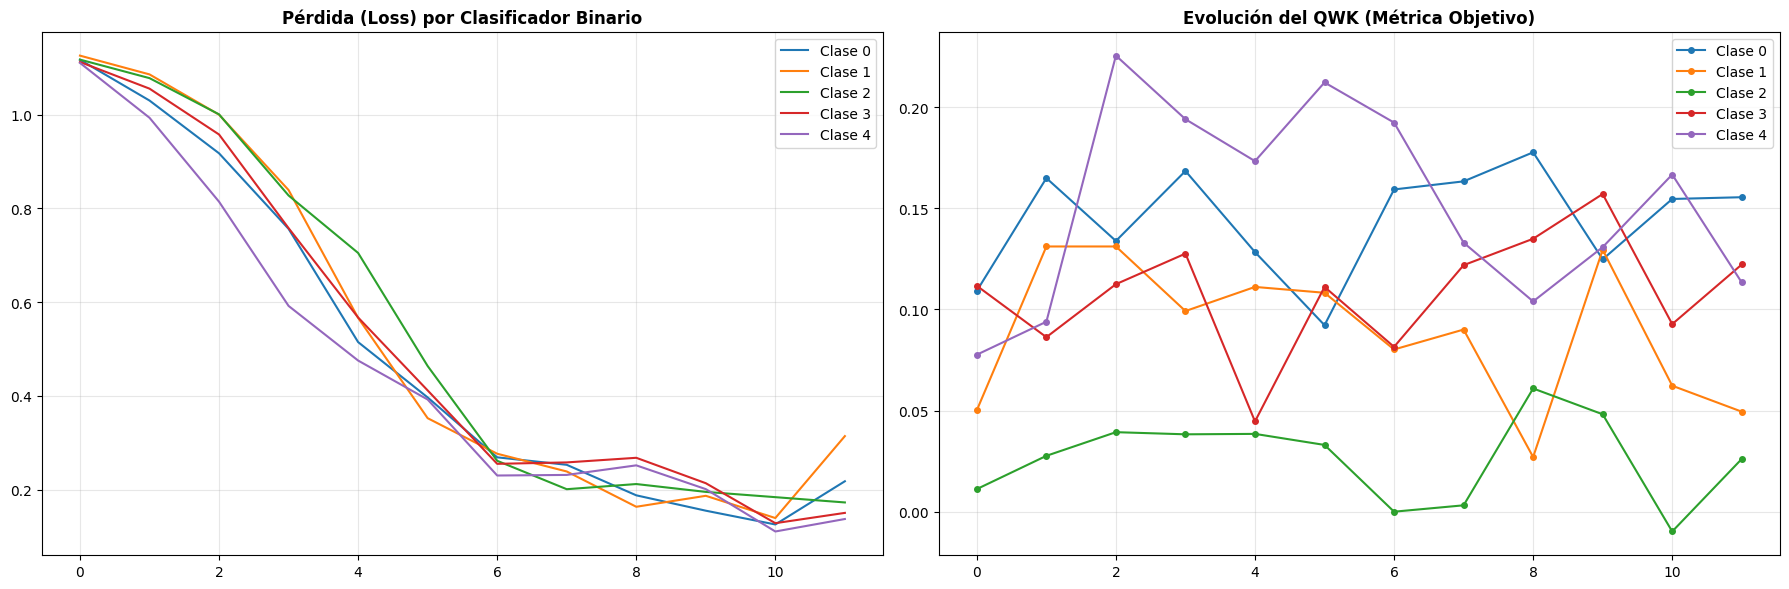


   RESULTADOS FINALES | ACC ENSAMBLADO: 0.3000 | QWK ENSAMBLADO: 0.2384


,Modelo,Mejor QWK,Época,Tiempo (s),Acc
0,ResNet50_C0,0.1777,9,664.30,0.7603
1,ResNet50_C1,0.1311,2,821.69,0.6397
2,ResNet50_C2,0.0609,9,835.74,0.7154
3,ResNet50_C3,0.1570,10,819.00,0.7192
4,ResNet50_C4,0.2254,3,686.15,0.7128


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.amp as amp
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from torch.utils.data import DataLoader
from torchvision import transforms, datasets, models
from sklearn.metrics import accuracy_score, cohen_kappa_score

#  ARQUITECTURA 
class PetNetResNet50(nn.Module):
    def __init__(self):
        super(PetNetResNet50, self).__init__()
        # Usamos ResNet50 por su mayor capacidad de extracción
        self.model = models.resnet50(weights='IMAGENET1K_V2')
        
        # Congelamos casi todo el modelo
        for param in self.model.parameters():
            param.requires_grad = False
            
        # Descongelamos el último bloque (layer4) para permitir adaptación fina
        for param in self.model.layer4.parameters():
            param.requires_grad = True
            
        # Cabeza de clasificación personalizada
        num_ftrs = self.model.fc.in_features
        self.model.fc = nn.Sequential(
            nn.Linear(num_ftrs, 512),
            nn.ReLU(),
            nn.Dropout(0.5), # Regularización fuerte
            nn.Linear(512, 1)
        )

    def forward(self, x):
        return self.model(x)

#  PREPARACIÓN DE DATOS CON AUGMENTATION 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
folder_modelos = '../modelos_expert'
if not os.path.exists(folder_modelos):
    os.makedirs(folder_modelos)

# Aumentamos la diversidad de los datos para mejorar la generalización
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

base_datos_drive = r'G:\Mi unidad\Mascotas\mini_dataset'
train_dataset = datasets.ImageFolder(os.path.join(base_datos_drive, 'Train'), transform=transform_train)
val_dataset = datasets.ImageFolder(os.path.join(base_datos_drive, 'Test'), transform=transform_val)

batch_size = 8
epochs = 12
num_classes = 5
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, pin_memory=True)

# BUCLE DE ENTRENAMIENTO POR CLASE 
all_histories = {}
resumen_final = []
scaler = amp.GradScaler('cuda')
train_targets = np.array(train_dataset.targets)

for class_id in range(num_classes):
    print(f"\n🔥 Entrenando Experto Clase {class_id} (ResNet50 + Fine-tuning)")
    
    model = PetNetResNet50().to(device)
    
    # Balanceo dinámico para el enfoque 1-vs-Rest
    pos_samples = (train_targets == class_id).sum()
    neg_samples = len(train_targets) - pos_samples
    pos_weight = torch.tensor([neg_samples / pos_samples]).to(device)
    
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
    # Optimizamos solo los parámetros que no están congelados
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001)
    
    historia = {"loss": [], "qwk": [], "acc": []}
    best_qwk = -1.0
    best_epoch = 0
    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0
        for inputs, labels in tqdm(train_loader, desc=f"C{class_id} | Ep {epoch+1}"):
            inputs = inputs.to(device)
            binary_labels = (labels == class_id).float().unsqueeze(1).to(device)
            
            optimizer.zero_grad(set_to_none=True)
            with amp.autocast('cuda'):
                outputs = model(inputs)
                loss = criterion(outputs, binary_labels)
            
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            epoch_loss += loss.item()

        # Validación
        model.eval()
        all_preds, all_labels = [], []
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                binary_labels = (labels == class_id).float().unsqueeze(1)
                outputs = model(inputs)
                preds = (torch.sigmoid(outputs) > 0.5).float()
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(binary_labels.cpu().numpy())

        current_qwk = cohen_kappa_score(all_labels, all_preds)
        current_acc = accuracy_score(all_labels, all_preds)
        
        historia["loss"].append(epoch_loss / len(train_loader))
        historia["qwk"].append(current_qwk)
        historia["acc"].append(current_acc)

        if current_qwk > best_qwk:
            best_qwk = current_qwk
            best_epoch = epoch + 1
            torch.save(model.state_dict(), os.path.join(folder_modelos, f'best_c{class_id}.pth'))

    total_time = time.time() - start_time
    all_histories[class_id] = historia
    resumen_final.append({
        "Modelo": f"ResNet50_C{class_id}",
        "Mejor QWK": round(best_qwk, 4),
        "Época": best_epoch,
        "Tiempo (s)": round(total_time, 2),
        "Acc": round(historia["acc"][best_epoch-1], 4)
    })

#  ENSAMBLADO Y GRÁFICAS 
print("\n🧩 Evaluando Ensamblado Final de Expertos...")
modelos_cargados = []
for i in range(num_classes):
    m = PetNetResNet50().to(device)
    m.load_state_dict(torch.load(os.path.join(folder_modelos, f'best_c{i}.pth')))
    m.eval()
    modelos_cargados.append(m)

final_preds, final_labels = [], []
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        logits = torch.cat([m(inputs) for m in modelos_cargados], dim=1)
        _, preds = torch.max(logits, 1)
        final_preds.extend(preds.cpu().numpy())
        final_labels.extend(labels.numpy())

# Gráficas de rendimiento
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
for i in range(num_classes):
    axes[0].plot(all_histories[i]["loss"], label=f'Clase {i}')
    axes[1].plot(all_histories[i]["qwk"], label=f'Clase {i}', marker='o', markersize=4)

axes[0].set_title('Pérdida (Loss) por Clasificador Binario', fontweight='bold')
axes[1].set_title('Evolución del QWK (Métrica Objetivo)', fontweight='bold')
for ax in axes: ax.legend(); ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Resumen final
df_resumen = pd.DataFrame(resumen_final)
ens_qwk = cohen_kappa_score(final_labels, final_preds, weights='quadratic')
ens_acc = accuracy_score(final_labels, final_preds)

print("\n" + "="*85)
print(f"   RESULTADOS FINALES | ACC ENSAMBLADO: {ens_acc:.4f} | QWK ENSAMBLADO: {ens_qwk:.4f}")
print("="*85)
display(df_resumen)


🔥 Entrenando Experto Clase 0 vs Resto


C0 | Ep 1: 100%|██████████| 5355/5355 [28:28<00:00,  3.13it/s]
C0 | Ep 2: 100%|██████████| 5355/5355 [24:59<00:00,  3.57it/s]
C0 | Ep 3: 100%|██████████| 5355/5355 [23:50<00:00,  3.74it/s]
C0 | Ep 4: 100%|██████████| 5355/5355 [27:25<00:00,  3.26it/s]
C0 | Ep 5: 100%|██████████| 5355/5355 [22:30<00:00,  3.97it/s]
C0 | Ep 6: 100%|██████████| 5355/5355 [22:09<00:00,  4.03it/s]
C0 | Ep 7: 100%|██████████| 5355/5355 [21:37<00:00,  4.13it/s]
C0 | Ep 8: 100%|██████████| 5355/5355 [21:36<00:00,  4.13it/s]
C0 | Ep 9: 100%|██████████| 5355/5355 [21:50<00:00,  4.09it/s]
C0 | Ep 10: 100%|██████████| 5355/5355 [21:46<00:00,  4.10it/s]
C0 | Ep 11: 100%|██████████| 5355/5355 [21:59<00:00,  4.06it/s]
C0 | Ep 12: 100%|██████████| 5355/5355 [22:15<00:00,  4.01it/s]



🔥 Entrenando Experto Clase 1 vs Resto


C1 | Ep 1: 100%|██████████| 5355/5355 [21:23<00:00,  4.17it/s]
C1 | Ep 2: 100%|██████████| 5355/5355 [22:03<00:00,  4.04it/s]
C1 | Ep 3: 100%|██████████| 5355/5355 [21:27<00:00,  4.16it/s]
C1 | Ep 4: 100%|██████████| 5355/5355 [22:22<00:00,  3.99it/s]  
C1 | Ep 5: 100%|██████████| 5355/5355 [21:58<00:00,  4.06it/s]
C1 | Ep 6: 100%|██████████| 5355/5355 [21:37<00:00,  4.13it/s]
C1 | Ep 7: 100%|██████████| 5355/5355 [21:41<00:00,  4.11it/s]
C1 | Ep 8: 100%|██████████| 5355/5355 [21:52<00:00,  4.08it/s]
C1 | Ep 9: 100%|██████████| 5355/5355 [21:45<00:00,  4.10it/s]
C1 | Ep 10: 100%|██████████| 5355/5355 [21:33<00:00,  4.14it/s]
C1 | Ep 11: 100%|██████████| 5355/5355 [21:32<00:00,  4.14it/s]
C1 | Ep 12: 100%|██████████| 5355/5355 [21:43<00:00,  4.11it/s]



🔥 Entrenando Experto Clase 2 vs Resto


C2 | Ep 1: 100%|██████████| 5355/5355 [21:48<00:00,  4.09it/s]
C2 | Ep 2: 100%|██████████| 5355/5355 [21:59<00:00,  4.06it/s]
C2 | Ep 3: 100%|██████████| 5355/5355 [21:47<00:00,  4.10it/s]
C2 | Ep 4: 100%|██████████| 5355/5355 [21:58<00:00,  4.06it/s]
C2 | Ep 5: 100%|██████████| 5355/5355 [21:55<00:00,  4.07it/s]
C2 | Ep 6: 100%|██████████| 5355/5355 [21:36<00:00,  4.13it/s]
C2 | Ep 7: 100%|██████████| 5355/5355 [21:41<00:00,  4.12it/s]
C2 | Ep 8: 100%|██████████| 5355/5355 [21:46<00:00,  4.10it/s]
C2 | Ep 9: 100%|██████████| 5355/5355 [21:45<00:00,  4.10it/s]
C2 | Ep 10: 100%|██████████| 5355/5355 [21:52<00:00,  4.08it/s]
C2 | Ep 11: 100%|██████████| 5355/5355 [21:51<00:00,  4.08it/s]
C2 | Ep 12: 100%|██████████| 5355/5355 [21:49<00:00,  4.09it/s]



🔥 Entrenando Experto Clase 3 vs Resto


C3 | Ep 1: 100%|██████████| 5355/5355 [21:52<00:00,  4.08it/s]
C3 | Ep 2: 100%|██████████| 5355/5355 [21:58<00:00,  4.06it/s]
C3 | Ep 3: 100%|██████████| 5355/5355 [21:56<00:00,  4.07it/s]
C3 | Ep 4: 100%|██████████| 5355/5355 [21:54<00:00,  4.07it/s]
C3 | Ep 5: 100%|██████████| 5355/5355 [21:59<00:00,  4.06it/s]
C3 | Ep 6: 100%|██████████| 5355/5355 [23:26<00:00,  3.81it/s]
C3 | Ep 7: 100%|██████████| 5355/5355 [23:46<00:00,  3.75it/s]
C3 | Ep 8: 100%|██████████| 5355/5355 [28:07<00:00,  3.17it/s]
C3 | Ep 9: 100%|██████████| 5355/5355 [25:59<00:00,  3.43it/s]
C3 | Ep 10: 100%|██████████| 5355/5355 [27:06<00:00,  3.29it/s]
C3 | Ep 11: 100%|██████████| 5355/5355 [24:49<00:00,  3.59it/s]
C3 | Ep 12: 100%|██████████| 5355/5355 [26:47<00:00,  3.33it/s]



🔥 Entrenando Experto Clase 4 vs Resto


C4 | Ep 1: 100%|██████████| 5355/5355 [26:01<00:00,  3.43it/s]
C4 | Ep 2: 100%|██████████| 5355/5355 [31:57<00:00,  2.79it/s]
C4 | Ep 3: 100%|██████████| 5355/5355 [32:39<00:00,  2.73it/s]
C4 | Ep 4: 100%|██████████| 5355/5355 [35:47<00:00,  2.49it/s]  
C4 | Ep 5: 100%|██████████| 5355/5355 [34:56<00:00,  2.55it/s]
C4 | Ep 6: 100%|██████████| 5355/5355 [31:51<00:00,  2.80it/s]
C4 | Ep 7: 100%|██████████| 5355/5355 [35:43<00:00,  2.50it/s] 
C4 | Ep 8: 100%|██████████| 5355/5355 [31:32<00:00,  2.83it/s] 
C4 | Ep 9: 100%|██████████| 5355/5355 [23:35<00:00,  3.78it/s]
C4 | Ep 10: 100%|██████████| 5355/5355 [24:05<00:00,  3.70it/s]
C4 | Ep 11: 100%|██████████| 5355/5355 [25:27<00:00,  3.51it/s]
C4 | Ep 12: 100%|██████████| 5355/5355 [23:10<00:00,  3.85it/s]



🧩 Construyendo y evaluando el Ensamblado...


C:\Users\Equipo\AppData\Local\Temp\ipykernel_12032\3320129926.py:156: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  m.load_state_dict(torch.load(os.path.join(folder_modelos,

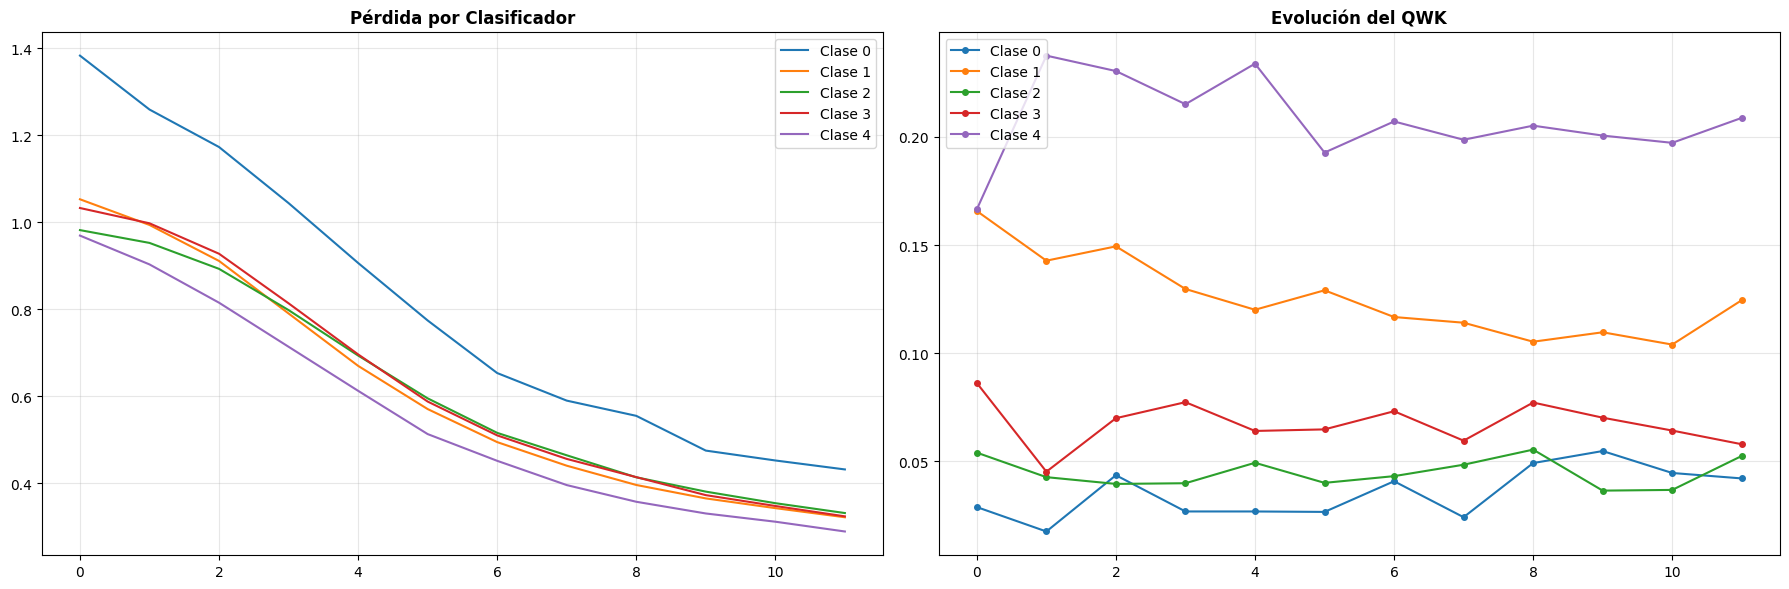

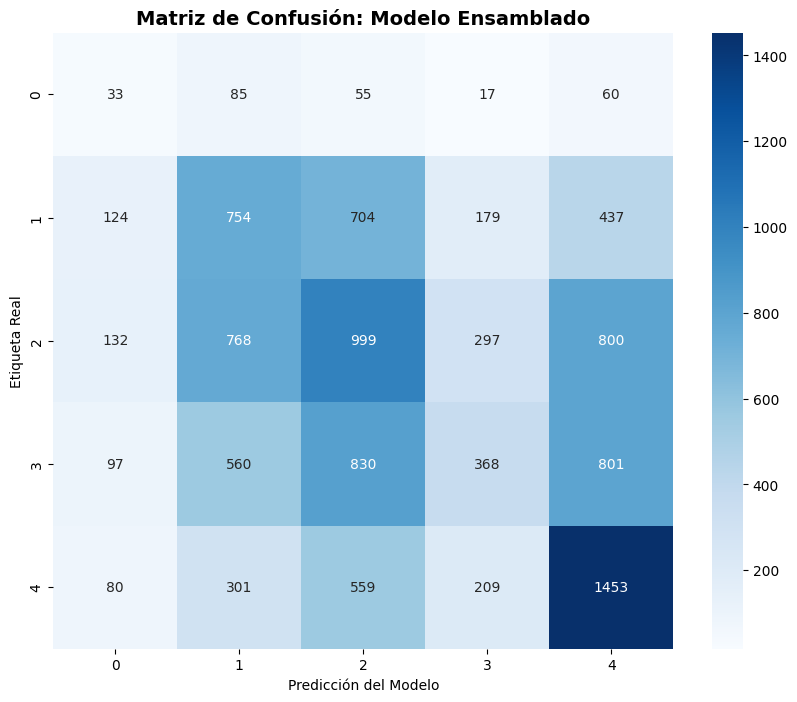


   RESULTADOS FINALES | ACC ENSAMBLADO: 0.3370 | QWK ENSAMBLADO: 0.2686


,Modelo,Mejor QWK,Época,Tiempo (s),Acc
0,ResNet50_C0,0.0548,10,18787.18,0.9113
1,ResNet50_C1,0.1657,1,17509.93,0.6395
2,ResNet50_C2,0.0555,9,17543.85,0.5890
3,ResNet50_C3,0.0863,1,19560.53,0.6599
4,ResNet50_C4,0.2376,2,23912.74,0.6402


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.amp as amp
import os
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from torch.utils.data import DataLoader
from torchvision import transforms, datasets, models
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix

#  ARQUITECTURA RESNET50 
class PetNetResNet50(nn.Module):
    def __init__(self):
        super(PetNetResNet50, self).__init__()
        # Cargamos ResNet50 con pesos optimizados de ImageNet
        self.model = models.resnet50(weights='IMAGENET1K_V2')
        
        # Congelamos las capas iniciales (conocimiento genérico)
        for param in self.model.parameters():
            param.requires_grad = False
            
        # Descongelamos el último bloque residual para especialización en mascotas
        for param in self.model.layer4.parameters():
            param.requires_grad = True
            
        # Rediseñamos la cabeza para clasificación binaria
        num_ftrs = self.model.fc.in_features
        self.model.fc = nn.Sequential(
            nn.Linear(num_ftrs, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 1)
        )

    def forward(self, x):
        return self.model(x)

#  PREPARACIÓN DE DATOS (Ruta: datos tratados) 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
folder_modelos = '../modelos_expert_dataset_completo'
if not os.path.exists(folder_modelos):
    os.makedirs(folder_modelos)

# Transformaciones con aumento de datos para regularización
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Actualización de ruta a la carpeta 'datos tratados'
base_datos_drive = r'G:\Mi unidad\Mascotas\datos tratados'
train_dataset = datasets.ImageFolder(os.path.join(base_datos_drive, 'Train'), transform=transform_train)
val_dataset = datasets.ImageFolder(os.path.join(base_datos_drive, 'Test'), transform=transform_val)

batch_size = 8
epochs = 12
num_classes = 5
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, pin_memory=True)

#  ENTRENAMIENTO DE LOS 5 ESPECIALISTAS BINARIOS 
all_histories = {}
resumen_final = []
scaler = amp.GradScaler('cuda')
train_targets = np.array(train_dataset.targets)

for class_id in range(num_classes):
    print(f"\n🔥 Entrenando Experto Clase {class_id} vs Resto")
    
    model = PetNetResNet50().to(device)
    
    # Pesos para combatir el desbalanceo del enfoque binario
    pos_samples = (train_targets == class_id).sum()
    neg_samples = len(train_targets) - pos_samples
    pos_weight = torch.tensor([neg_samples / pos_samples]).to(device)
    
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001)
    
    historia = {"loss": [], "qwk": [], "acc": []}
    best_qwk = -1.0
    best_epoch = 0
    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0
        for inputs, labels in tqdm(train_loader, desc=f"C{class_id} | Ep {epoch+1}"):
            inputs = inputs.to(device)
            binary_labels = (labels == class_id).float().unsqueeze(1).to(device)
            
            optimizer.zero_grad(set_to_none=True)
            with amp.autocast('cuda'):
                outputs = model(inputs)
                loss = criterion(outputs, binary_labels)
            
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            epoch_loss += loss.item()

        # Fase de validación por época
        model.eval()
        all_preds, all_labels = [], []
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                binary_labels = (labels == class_id).float().unsqueeze(1)
                outputs = model(inputs)
                preds = (torch.sigmoid(outputs) > 0.5).float()
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(binary_labels.cpu().numpy())

        current_qwk = cohen_kappa_score(all_labels, all_preds)
        current_acc = accuracy_score(all_labels, all_preds)
        
        historia["loss"].append(epoch_loss / len(train_loader))
        historia["qwk"].append(current_qwk)
        historia["acc"].append(current_acc)

        # Guardamos el estado si el QWK mejora
        if current_qwk > best_qwk:
            best_qwk = current_qwk
            best_epoch = epoch + 1
            torch.save(model.state_dict(), os.path.join(folder_modelos, f'best_c{class_id}.pth'))

    total_time = time.time() - start_time
    all_histories[class_id] = historia
    resumen_final.append({
        "Modelo": f"ResNet50_C{class_id}",
        "Mejor QWK": round(best_qwk, 4),
        "Época": best_epoch,
        "Tiempo (s)": round(total_time, 2),
        "Acc": round(historia["acc"][best_epoch-1], 4)
    })

# EVALUACIÓN DEL ENSAMBLADO FINAL 
print("\n🧩 Construyendo y evaluando el Ensamblado...")
modelos_cargados = []
for i in range(num_classes):
    m = PetNetResNet50().to(device)
    m.load_state_dict(torch.load(os.path.join(folder_modelos, f'best_c{i}.pth')))
    m.eval()
    modelos_cargados.append(m)

final_preds, final_labels = [], []
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        # Obtenemos los logits de los 5 modelos y elegimos el máximo
        logits = torch.cat([m(inputs) for m in modelos_cargados], dim=1)
        _, preds = torch.max(logits, 1)
        final_preds.extend(preds.cpu().numpy())
        final_labels.extend(labels.numpy())

# VISUALIZACIÓN DE RESULTADOS 
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
for i in range(num_classes):
    axes[0].plot(all_histories[i]["loss"], label=f'Clase {i}')
    axes[1].plot(all_histories[i]["qwk"], label=f'Clase {i}', marker='o', markersize=4)

axes[0].set_title('Pérdida por Clasificador', fontweight='bold')
axes[1].set_title('Evolución del QWK', fontweight='bold')
for ax in axes: ax.legend(); ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# MATRIZ DE CONFUSIÓN 
cm = confusion_matrix(final_labels, final_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))
plt.title('Matriz de Confusión: Modelo Ensamblado', fontsize=14, fontweight='bold')
plt.xlabel('Predicción del Modelo')
plt.ylabel('Etiqueta Real')
plt.show()

# RESUMEN FINAL 
df_resumen = pd.DataFrame(resumen_final)
ens_qwk = cohen_kappa_score(final_labels, final_preds, weights='quadratic')
ens_acc = accuracy_score(final_labels, final_preds)

print("\n" + "="*85)
print(f"   RESULTADOS FINALES | ACC ENSAMBLADO: {ens_acc:.4f} | QWK ENSAMBLADO: {ens_qwk:.4f}")
print("="*85)
display(df_resumen)